### BADASS Analysis - can we better tell the difference between glutamate, arginine, serine, valine and tryptophan using a larger array of barrels?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Large array amino acid data

In [3]:
l_aa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/AAs/Same_plate_AAs/Large_array',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Small array amino acid data

In [4]:
s_aa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/AAs/Same_plate_AAs/Standard_array',
    control_peptides=['GRP35', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                      'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                      'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                      'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                      'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                      'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                      'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                      'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    control_analytes=[]
)

Locate xlsx files

In [5]:
l_aa_fluor_data.group_xlsx_repeats()

In [6]:
s_aa_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [7]:
l_aa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/W_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/S_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/E_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Refo

In [8]:
s_aa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/W_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/S_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/E_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Refo

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [9]:
l_aa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: E, 3 (flagged readings = CCHept-I17A-L21A: 0.4913996193607859) 
 Outlier excluded from final output dataset: R, 8 (flagged readings = QLKEIA: 1.1058902102013586, NLKEIA: 0.6432415609183197, CCHex2: 0.44921957754392083, CCHept: 0.38990660557669954) 
 Outlier excluded from final output dataset: R, 6 (flagged readings = CCPent-I24K: 0.36275988972394413) 


In [10]:
s_aa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: R, 8 (flagged readings = CCHex2: 0.44921957754392083, CCHept: 0.38990660557669954) 


In [11]:
l_aa_fluor_data.ml_fluor_data

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   1.051879  0.905797     1.121725     1.098495     1.014482  0.942035   
1   1.149086  0.683616     0.934032     1.057975     0.934924  0.951269   
2   0.941075  0.780423     0.850063     0.971042     0.986674  0.783746   
3   1.010064  0.905797     0.887739     1.090656     0.945020  0.972455   
4   1.046074  1.068182     0.966707     0.995206     0.935573  0.802243   
5   0.981874  1.087838     1.009571     1.025349     0.937250  0.900656   
6   1.037135  1.000000     0.923944     0.972539     0.928397  0.886508   
7   0.965096  0.994536     0.990409     1.032959     0.949301  0.906921   
8   1.036483  0.880795     0.864968     1.047196     0.959202  0.906947   
9   1.012070  1.132075     1.048700     1.104314     0.981594  0.948993   
10  0.923840  1.520000     0.870054     0.854396     0.912125  0.795706   
11  1.042266  1.515723     0.886029     0.936381     0.949879  0.896599   
12  1.047779  2.000000     0.837868     1.015947     0.963729  0.910207   
13  0.991597  1.801587     0.662736     0.934360     0.852408  0.770376   
14  1.093379  1.730159     0.874666     1.048089     0.966698  0.982941   
15  1.081413  1.774390     1.068866     1.002002     0.983173  0.892411   
16  1.002247  1.598592     0.705118     0.940705     0.880726  0.744251   
17  1.072340  1.707692     0.693902     1.063752     0.897467  0.827298   
18  1.103635  1.832000     0.511031     1.113429     0.929349  0.640744   
19  1.060091  1.613095     0.716846     1.120461     0.956522  0.753939   
20  1.046260  1.059459     0.943384     1.057794     0.971638  0.967880   
21  1.014316  0.854331     0.909236     0.917590     0.947695  0.990762   
22  1.015829  1.126374     0.996728     0.998135     0.963210  0.869580   
23  0.979676  0.954023     0.918322     0.922812     0.931199  0.930238   
24  1.025877  1.041667     0.925442     1.015227     1.000965  0.839242   
25  0.895242  0.786667     0.936800     0.814494     0.901722  0.918179   
26  1.041915  1.138614     0.960142     0.909119     0.947007  0.806508   
27  1.030931  1.311475     0.920490     0.989673     0.881294  0.964213   
28  1.009954  1.144509     1.077996     1.026483     0.999738  0.940467   
29  0.882853  0.579439     0.939586     0.939522     0.853172  0.911123   
30  0.976109  0.850746     0.911490     0.960519     0.993028  0.949563   
31  1.172955  0.856322     0.968225     1.041973     0.970500  1.007900   
32  1.055407  0.858382     1.057894     1.067557     0.984581  0.936560   
33  1.033773  1.066079     0.997548     1.026339     0.945068  0.916875   
34  1.095672  1.024793     1.020617     1.061357     0.936312  0.942782   
35  1.001981  1.176471     0.935011     0.997896     0.916484  0.776465   
36  0.920046  0.851562     0.942115     0.968176     0.925701  0.927754   
37  0.878257  0.795620     0.935411     0.880725     0.875303  0.872184   
38  1.011153  0.992958     0.941305     0.888402     0.861906  0.918112   
39  1.026325  1.053571     1.034778     1.010514     1.004756  0.943744   
40  1.014910  0.937853     0.930433     1.044855     0.979722  0.866931   
41  1.176067  1.006849     0.934257     1.019873     0.980434  0.928815   
42  0.968238  0.878641     0.837904     0.888387     0.931401  0.876360   
43  1.011632  0.712166     0.864056     0.987900     0.964710  0.818861   
44  0.989725  1.139130     0.873952     0.977018     0.918447  0.814248   
45  0.981264  1.000000     0.915024     1.019939     0.934679  0.832860   
46  0.982294  1.044248     0.879690     0.876849     0.931399  0.859980   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   1.031910  1.004918     1.024780     0.987017  ...          0.902249   
1   1.027293  1.010694     1.100948     1.170468  ...          0.871322   
2   0.916271  0.934883     0.872713     0.949529  ...          0.936909   
3   1.003541  0.925148     0.949527     1.084358  ...          0.818970   
4   0.963522  1.015438     1.0

In [12]:
s_aa_fluor_data.ml_fluor_data

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept     GRP51  \
0   1.051879  0.942035  1.031910  0.919842  1.011236  0.976355  0.977364   
1   1.149086  0.951269  1.027293  0.938499  1.048113  0.937701  1.027522   
2   0.941075  0.783746  0.916271  0.941018  1.123656  1.044748  0.963467   
3   1.010064  0.972455  1.003541  0.836575  1.224758  0.928298  0.864103   
4   1.046074  0.802243  0.963522  0.887766  0.903488  0.814486  1.062798   
5   0.981874  0.900656  0.928103  0.951465  0.986382  0.968971  0.949982   
6   1.037135  0.886508  0.931141  0.822305  1.034596  0.884104  1.010238   
7   0.965096  0.906921  1.029898  0.856733  1.091729  0.953301  0.967775   
8   1.036483  0.906947  1.039386  0.939469  1.214543  0.857902  0.961671   
9   1.012070  0.948993  0.856452  1.043788  0.936170  0.990628  0.975463   
10  0.923840  0.795706  0.887345  0.563442  1.268180  0.816167  1.054285   
11  1.042266  0.896599  0.950980  0.747435  1.251526  0.892850  0.922486   
12  1.047779  0.910207  1.032148  0.562930  1.442345  0.846924  0.929208   
13  0.991597  0.770376  0.847440  0.524585  1.188288  0.700290  1.043653   
14  1.093379  0.982941  0.900051  0.682701  1.358779  0.867691  0.970586   
15  1.081413  0.892411  1.026809  0.704146  1.309672  0.873617  0.921324   
16  1.002247  0.744251  0.831296  0.664252  1.060084  0.784299  0.853157   
17  1.072340  0.827298  0.778373  0.520568  1.467059  0.737657  0.967105   
18  1.103635  0.640744  0.899216  0.373705  2.246137  0.466378  0.839205   
19  1.060091  0.753939  0.956116  0.346233  1.694444  0.561294  0.829359   
20  1.046260  0.967880  1.101256  1.029977  1.038501  0.970892  0.939209   
21  1.014316  0.990762  0.897870  1.009740  1.044436  0.916738  0.996276   
22  1.015829  0.869580  1.016383  0.945402  1.223825  0.952244  0.996418   
23  0.979676  0.930238  1.019816  0.859222  1.051243  1.026392  1.061149   
24  1.025877  0.839242  0.918696  1.058235  1.067131  1.116735  1.030361   
25  0.895242  0.918179  0.961791  0.893418  0.934125  0.813711  0.911868   
26  1.041915  0.806508  0.786366  1.052043  1.006693  0.884613  0.966354   
27  1.030931  0.964213  1.010827  0.943671  1.056853  0.946597  1.031375   
28  1.009954  0.940467  1.020772  1.053609  1.026290  0.997787  0.919126   
29  0.882853  0.911123  0.753476  0.861354  1.089047  0.951310  0.981925   
30  0.976109  0.949563  0.996667  0.928603  1.050979  1.055750  1.087073   
31  1.172955  1.007900  1.019342  0.869341  1.005268  0.973131  0.989500   
32  1.055407  0.936560  1.084719  0.837938  1.002874  1.021822  1.082513   
33  0.938707  0.792963  0.917199  1.185599  0.886913  0.964539  0.956205   
34  1.033773  0.916875  1.043706  0.891774  1.110161  1.021271  1.043254   
35  1.095672  0.942782  0.967531  0.874646  0.876930  0.913090  1.019619   
36  1.001981  0.776465  0.906775  1.068413  0.955132  0.898544  0.942648   
37  0.920046  0.927754  0.917282  1.122665  1.085730  1.036570  0.883061   
38  0.878257  0.872184  0.960214  1.009322  1.127614  1.060397  0.990745   
39  1.011153  0.918112  0.965003  0.923700  1.073462  0.970892  0.949922   
40  1.026325  0.943744  1.020925  0.828859  1.188418  0.912472  1.068432   
41  1.014910  0.866931  0.960059  0.919619  1.114418  0.858822  0.980590   
42  1.176067  0.928815  1.055619  0.837796  1.129153  0.876671  0.945262   
43  0.968238  0.876360  0.963258  0.704331  1.066952  0.821334  0.831480   
44  1.011632  0.818861  0.919994  0.808140  1.298170  0.959910  0.955043   
45  0.989725  0.814248  0.740058  0.884821  1.033119  0.804073  1.144127   
46  0.997902  0.732200  0.830969  0.919318  0.932857  0.823927  0.849935   
47  0.981264  0.832860  1.004771  0.841190  1.067788  0.897904  0.982793   
48  0.982294  0.859980  0.928579  0.844741  0.979122  0.846988  0.880849   

    CCHept-I24D     GRP52  CCHept-I24E     GRP63  CCHept-I24K     GRP80  \
0      0.916772  0.988297     1.079213  0.947713     0.914719  0.936700   
1      0.976101  0.987609     1.064227  0.937394     0.

In [13]:
l_aa_fluor_data = l_aa_fluor_data.ml_fluor_data

In [14]:
s_aa_fluor_data = s_aa_fluor_data.ml_fluor_data

Generates "representative" fingerprint for each class (by calculating the median value for each feature)

V


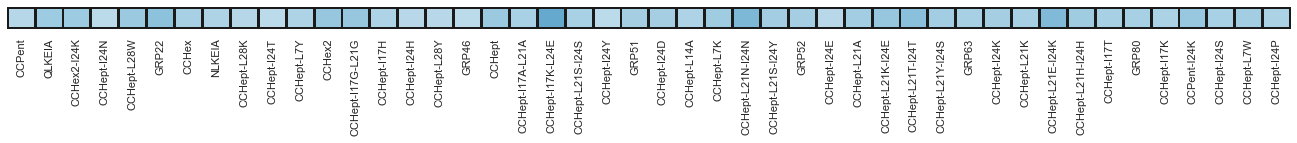

W


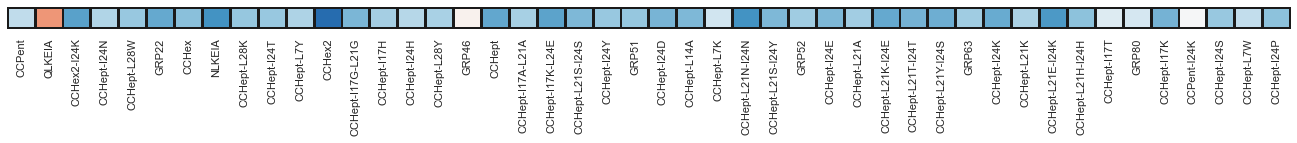

S


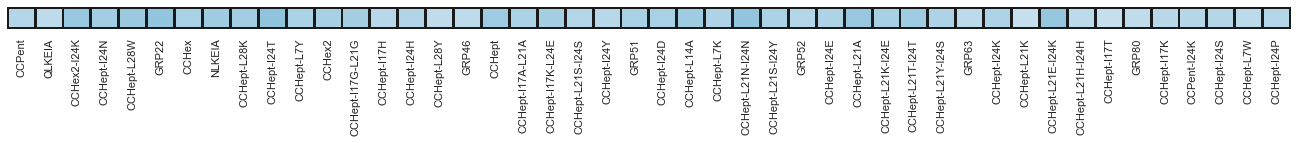

E


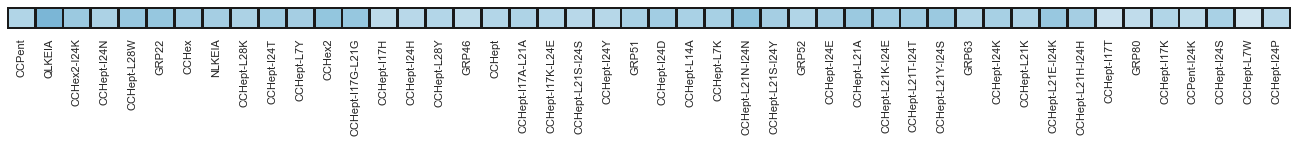

R


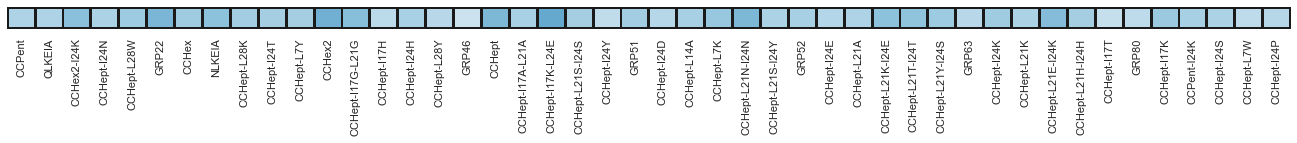

In [15]:
classes = []
for class_name in l_aa_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
l_aa_fluor_data_x_val = l_aa_fluor_data.drop(['Analyte'], axis=1)
vmin = l_aa_fluor_data_x_val.values.min()
vmax = l_aa_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(l_aa_fluor_data.shape[0])
                     if l_aa_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(l_aa_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(23,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=l_aa_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

V


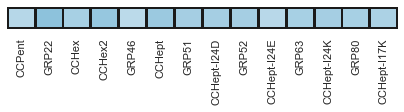

W


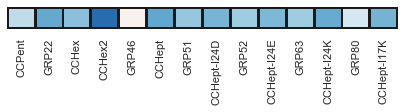

S


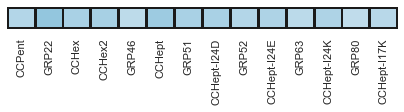

E


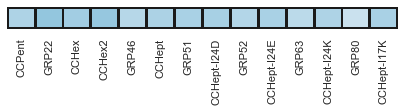

R


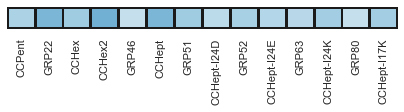

In [16]:
classes = []
for class_name in s_aa_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
s_aa_fluor_data_x_val = s_aa_fluor_data.drop(['Analyte'], axis=1)
vmin = s_aa_fluor_data_x_val.values.min()
vmax = s_aa_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(s_aa_fluor_data.shape[0])
                     if s_aa_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(s_aa_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(7,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=s_aa_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 14 / 46 features

Glutamate


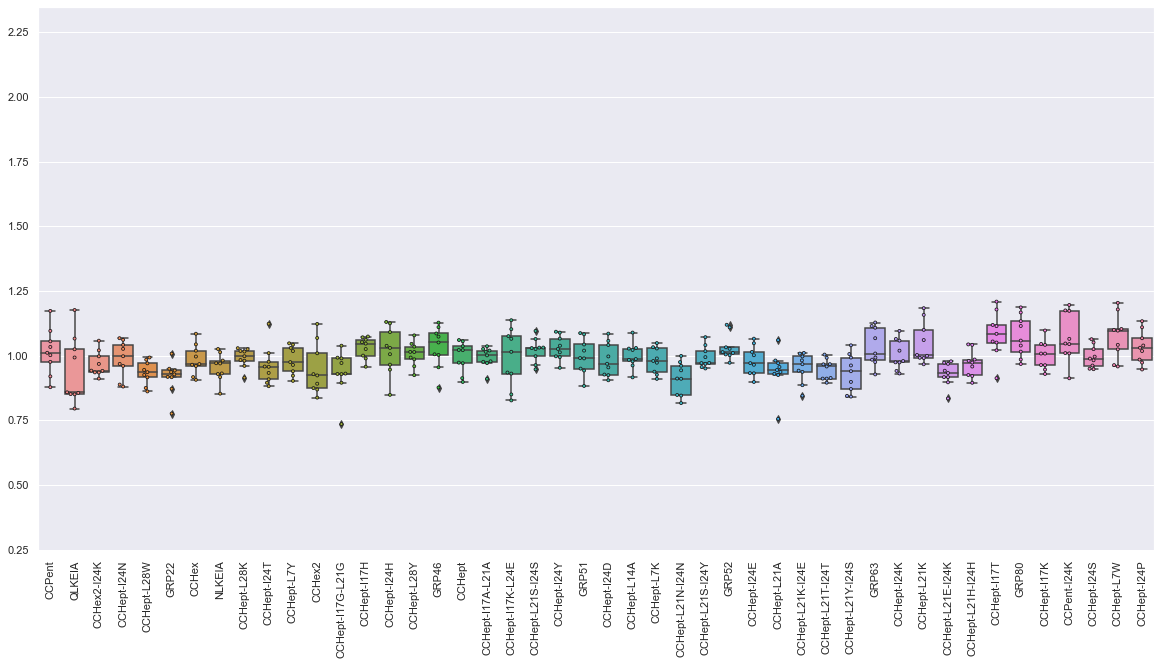

Arginine


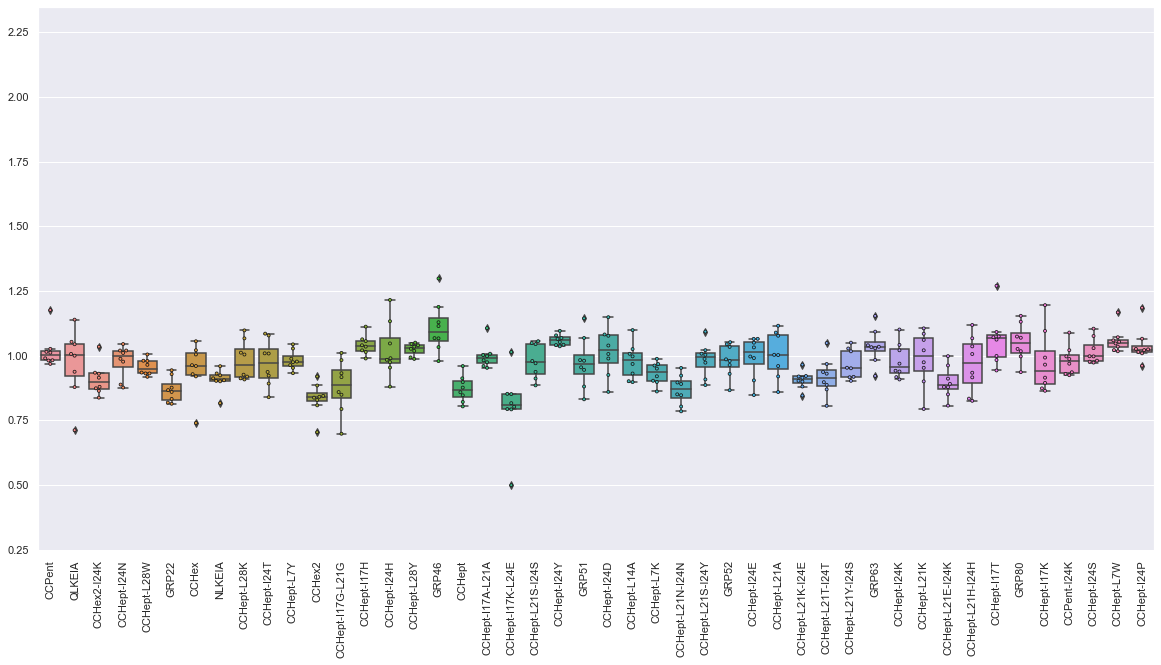

Serine


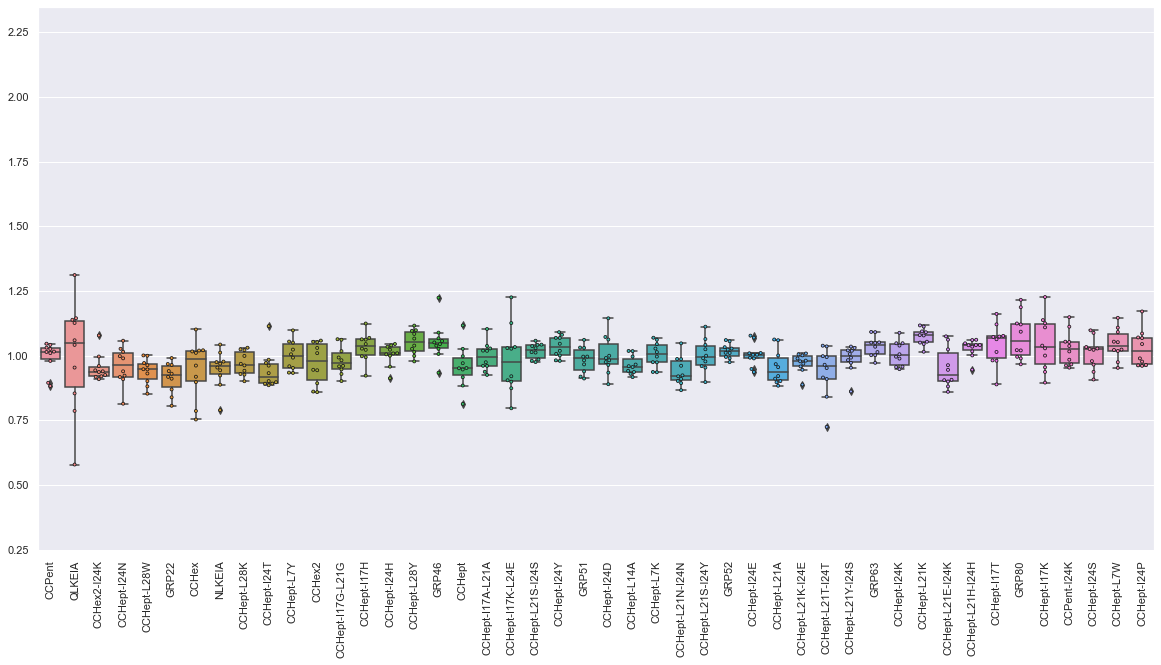

Tryptophan


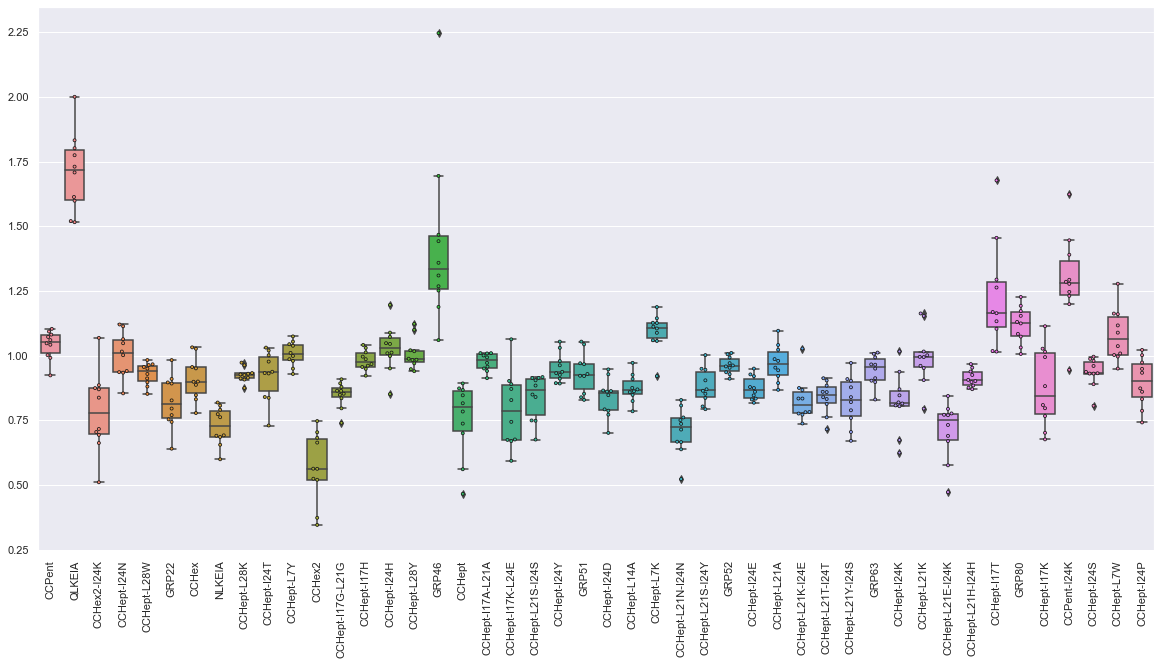

Valine


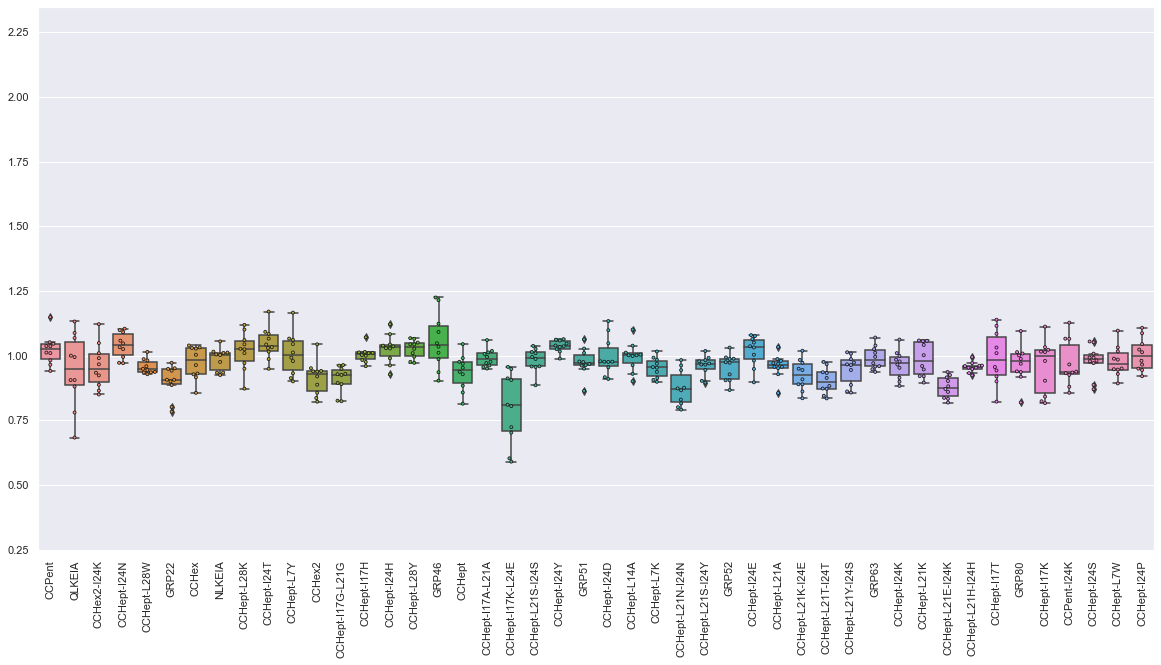

In [17]:
ymin = l_aa_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = l_aa_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

e_indices = [int(i) for i in range(l_aa_fluor_data.shape[0])
             if l_aa_fluor_data['Analyte'][i] == 'E']
r_indices = [int(i) for i in range(l_aa_fluor_data.shape[0])
             if l_aa_fluor_data['Analyte'][i] == 'R']
s_indices = [int(i) for i in range(l_aa_fluor_data.shape[0])
             if l_aa_fluor_data['Analyte'][i] == 'S']
w_indices = [int(i) for i in range(l_aa_fluor_data.shape[0])
             if l_aa_fluor_data['Analyte'][i] == 'W']
v_indices = [int(i) for i in range(l_aa_fluor_data.shape[0])
             if l_aa_fluor_data['Analyte'][i] == 'V']

sns.set(rc={'figure.figsize':(20,10)})
print('Glutamate')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_fluor_data.iloc[e_indices])
sns.swarmplot(data=l_aa_fluor_data.iloc[e_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Arginine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_fluor_data.iloc[r_indices])
sns.swarmplot(data=l_aa_fluor_data.iloc[r_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Serine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_fluor_data.iloc[s_indices])
sns.swarmplot(data=l_aa_fluor_data.iloc[s_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Tryptophan')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_fluor_data.iloc[w_indices])
sns.swarmplot(data=l_aa_fluor_data.iloc[w_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Valine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_aa_fluor_data.iloc[v_indices])
sns.swarmplot(data=l_aa_fluor_data.iloc[v_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

Glutamate


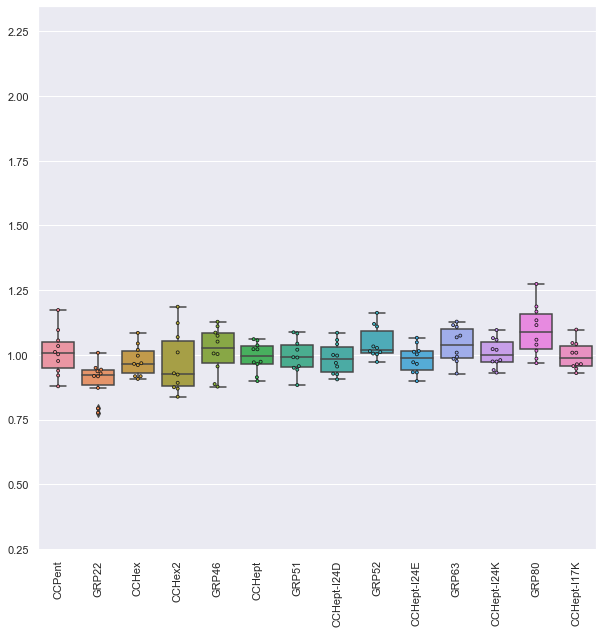

Arginine


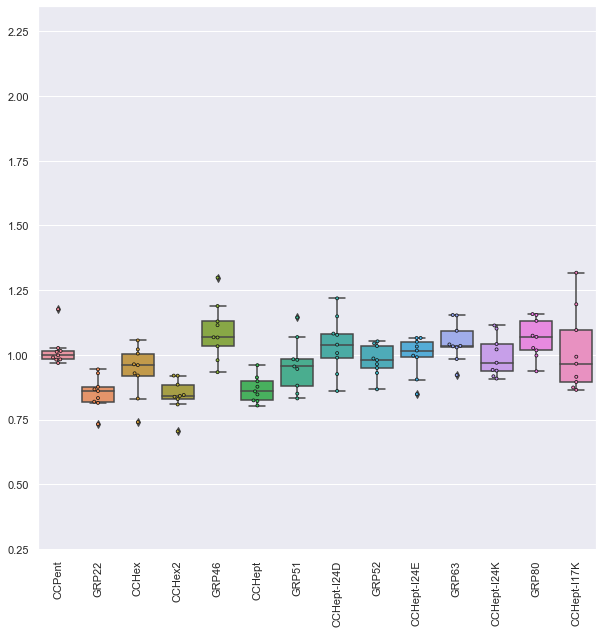

Serine


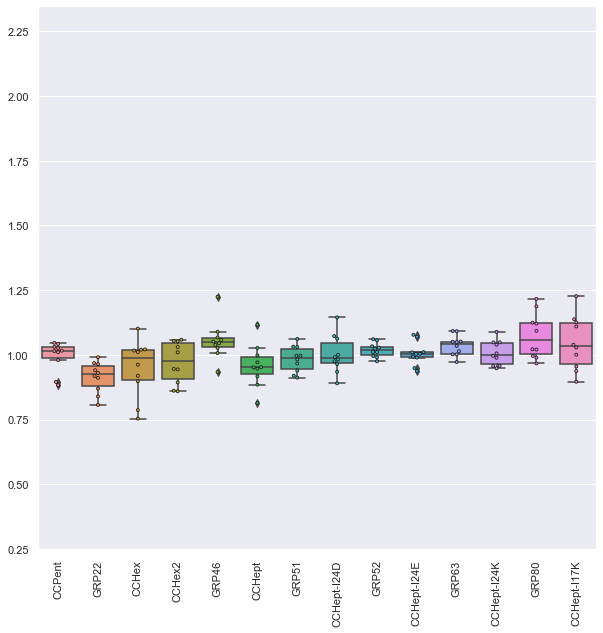

Tryptophan


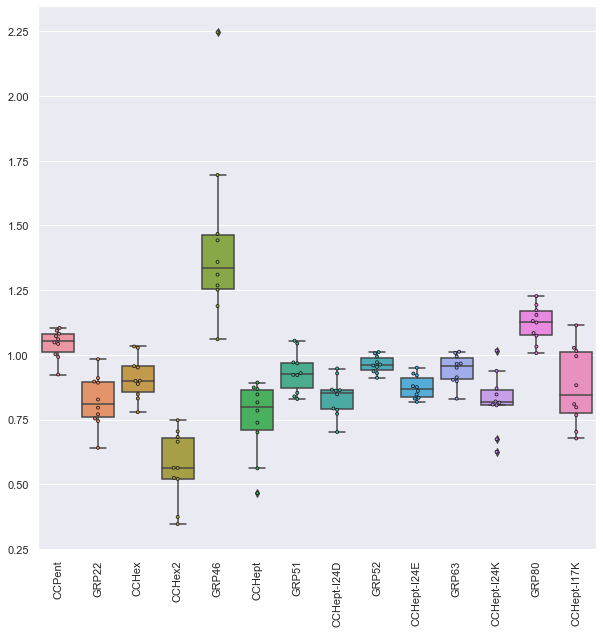

Valine


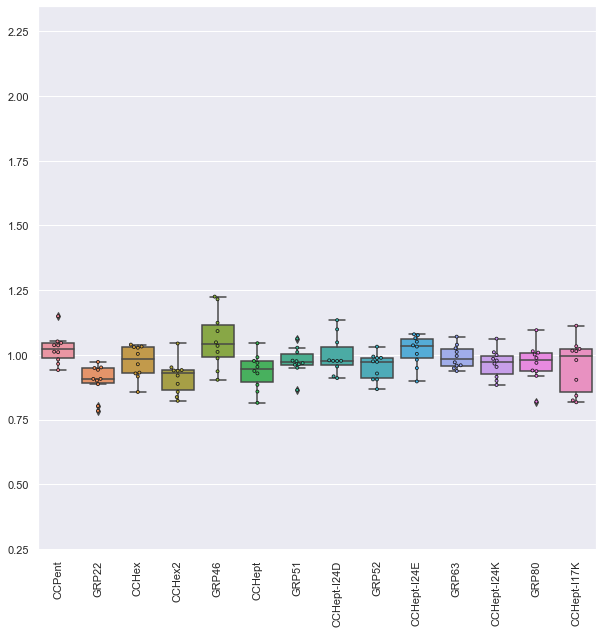

In [18]:
ymin = s_aa_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = s_aa_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

e_indices = [int(i) for i in range(s_aa_fluor_data.shape[0])
             if s_aa_fluor_data['Analyte'][i] == 'E']
r_indices = [int(i) for i in range(s_aa_fluor_data.shape[0])
             if s_aa_fluor_data['Analyte'][i] == 'R']
s_indices = [int(i) for i in range(s_aa_fluor_data.shape[0])
             if s_aa_fluor_data['Analyte'][i] == 'S']
w_indices = [int(i) for i in range(s_aa_fluor_data.shape[0])
             if s_aa_fluor_data['Analyte'][i] == 'W']
v_indices = [int(i) for i in range(s_aa_fluor_data.shape[0])
             if s_aa_fluor_data['Analyte'][i] == 'V']

sns.set(rc={'figure.figsize':(10,10)})
print('Glutamate')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_aa_fluor_data.iloc[e_indices])
sns.swarmplot(data=s_aa_fluor_data.iloc[e_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Arginine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_aa_fluor_data.iloc[r_indices])
sns.swarmplot(data=s_aa_fluor_data.iloc[r_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Serine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_aa_fluor_data.iloc[s_indices])
sns.swarmplot(data=s_aa_fluor_data.iloc[s_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Tryptophan')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_aa_fluor_data.iloc[w_indices])
sns.swarmplot(data=s_aa_fluor_data.iloc[w_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Valine')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_aa_fluor_data.iloc[v_indices])
sns.swarmplot(data=s_aa_fluor_data.iloc[v_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

#### Run machine learning

In [19]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

- Large array

First split the data into a training and test set

In [20]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/AAs/'
                'Same_plate_AAs/Large_array_ML_results/', fluor_data=l_aa_fluor_data
)

In [21]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 46 features

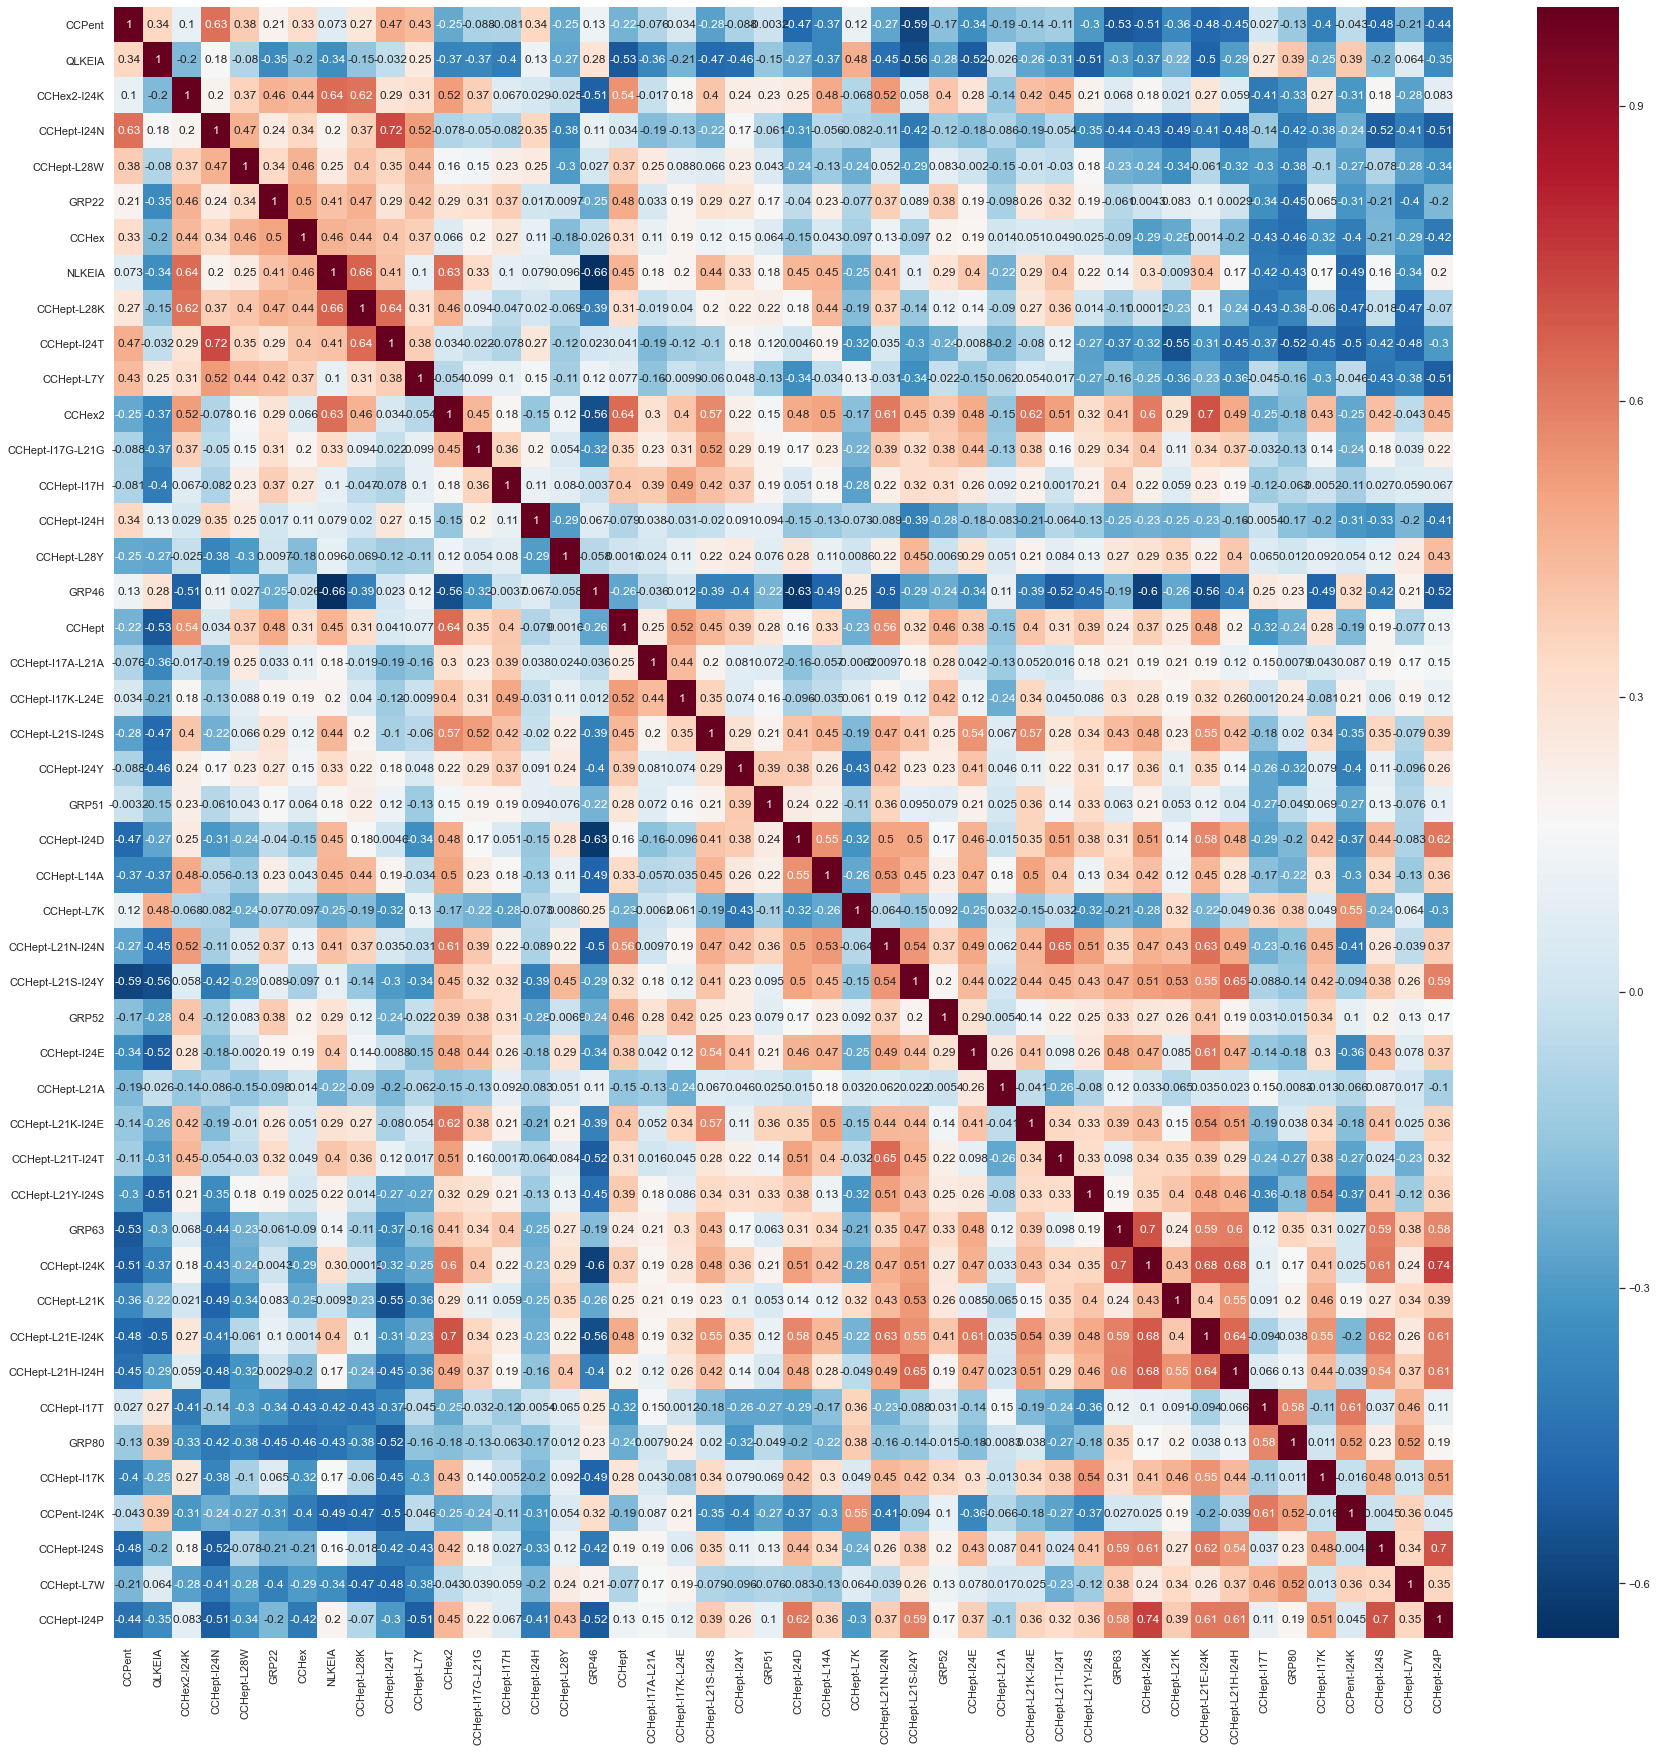

In [22]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
ml.calc_feature_correlations(train_data=ml.fluor_data)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

- Measure the relative importances of the initial 46 features

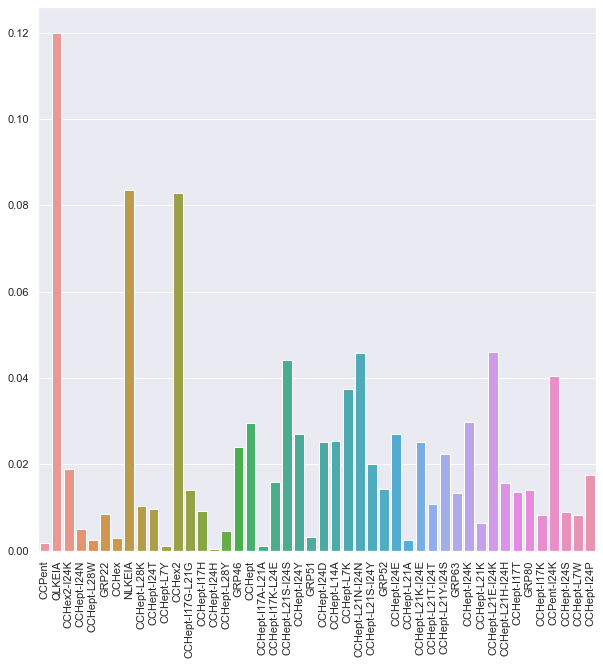

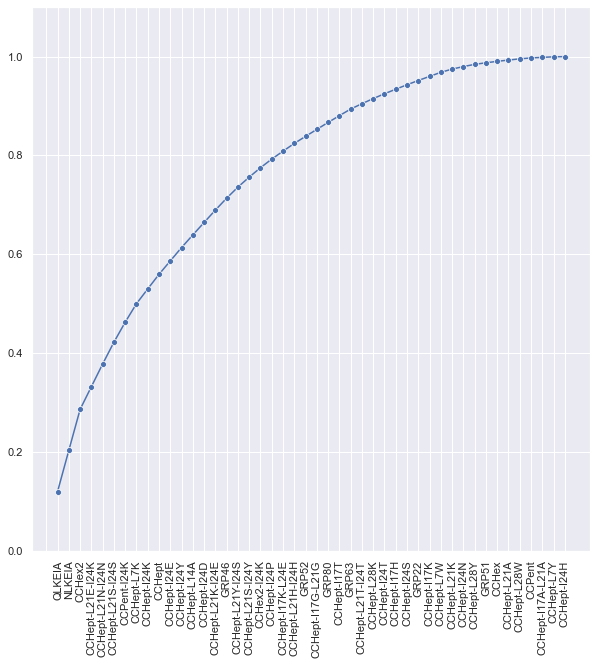

Feature     Score
0             QLKEIA  0.119888
1             NLKEIA  0.083498
2             CCHex2  0.082774
3   CCHept-L21E-I24K  0.046037
4   CCHept-L21N-I24N  0.045831
5   CCHept-L21S-I24S  0.044154
6        CCPent-I24K  0.040469
7         CCHept-L7K  0.037412
8        CCHept-I24K  0.029868
9             CCHept  0.029575
10       CCHept-I24E  0.027080
11       CCHept-I24Y  0.027054
12       CCHept-L14A  0.025534
13       CCHept-I24D  0.025211
14  CCHept-L21K-I24E  0.025080
15             GRP46  0.024112
16  CCHept-L21Y-I24S  0.022387
17  CCHept-L21S-I24Y  0.020187
18       CCHex2-I24K  0.018979
19       CCHept-I24P  0.017562
20  CCHept-I17K-L24E  0.015910
21  CCHept-L21H-I24H  0.015749
22             GRP52  0.014256
23  CCHept-I17G-L21G  0.014149
24             GRP80  0.014106
25       CCHept-I17T  0.013620
26             GRP63  0.013432
27  CCHept-L21T-I24T  0.010810
28       CCHept-L28K  0.010350
29       CCHept-I24T  0.009778
30       CCHept-I17H  0.009140
31       CCHept-I24S  0.009099
32             GRP22  0.008581
33       CCHept-I17K  0.008311
34        CCHept-L7W  0.008227
35       CCHept-L21K  0.006552
36       CCHept-I24N  0.005080
37       CCHept-L28Y  0.004488
38             GRP51  0.003162
39             CCHex  0.002944
40       CCHept-L21A  0.002576
41       CCHept-L28W  0.002508
42            CCPent  0.001811
43  CCHept-I17A-L21A  0.001158
44        CCHept-L7Y  0.001118
45       CCHept-I24H  0.000394

In [23]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

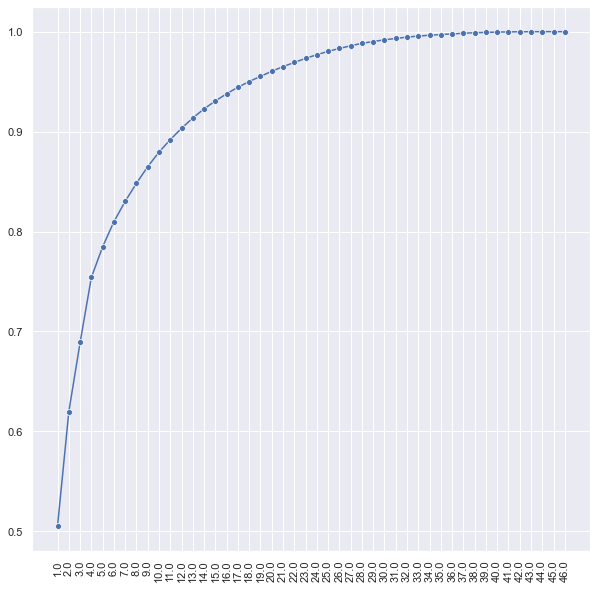

In [24]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 46 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [25]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 47)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [26]:
pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.035570  0.609372    -0.153925     0.030217    -0.010772   
2         -0.105106  0.277163    -0.033090    -0.183361    -0.077103   
3         -0.142907 -0.532494    -0.319283    -0.132389    -0.083964   
4         -0.054517  0.168898     0.010989    -0.039715    -0.036544   
5          0.093297 -0.112263    -0.074904     0.121740    -0.023499   
6          0.005369  0.330611    -0.045744     0.058157     0.003686   
7          0.112923 -0.078196    -0.217851     0.005306    -0.032795   
8          0.077038  0.026635     0.115868     0.044802     0.093977   
9         -0.074345  0.093097     0.042701    -0.240646    -0.015381   
10        -0.091188 -0.015070     0.085133     0.049018     0.101319   
11        -0.027718 -0.136983     0.146510     0.113519     0.011396   
12        -0.300052  0.051494    -0.159651    -0.043704    -0.133457   
13         0.070718  0.096280    -0.165186     0.095446     0.161362   
14        -0.241411  0.060430     0.133174     0.011156     0.077400   
15        -0.213537 -0.001239    -0.000743    -0.091140     0.042004   
16         0.193062  0.033869    -0.138580     0.005795     0.041934   
17         0.136775  0.012206     0.029956    -0.198076     0.015072   
18         0.117415  0.066403    -0.366731     0.176845    -0.073435   
19         0.021998  0.046224     0.116620     0.028348     0.113378   
20        -0.170399 -0.032232     0.066180    -0.331447     0.125373   
21         0.084061 -0.046959     0.274892     0.054935     0.122918   
22         0.202609 -0.021506     0.123696     0.231385     0.108114   
23         0.121962  0.093032     0.060652    -0.262832     0.004789   
24        -0.102508 -0.003719     0.263921    -0.081919    -0.066663   
25        -0.012641  0.036654     0.002458     0.350174     0.129397   
26         0.085290  0.015503    -0.253355     0.041942     0.113816   
27         0.122112  0.009316    -0.128515    -0.077256     0.067745   
28         0.268902 -0.021439     0.191459    -0.059016    -0.118349   
29         0.326547  0.034462    -0.277832    -0.241587    -0.012720   
30        -0.199118  0.135183    -0.039575    -0.083333    -0.136507   
31         0.114171 -0.062238     0.029681     0.000912    -0.043825   
32         0.185162 -0.044690     0.050088    -0.076603    -0.106306   
33        -0.083281  0.063508     0.059666    -0.097361     0.017285   
34        -0.053623  0.044269     0.121821     0.117349    -0.253234   
35         0.005245 -0.048613     0.081627    -0.161336    -0.203469   
36        -0.061023  0.011209    -0.035438    -0.026012     0.358543   
37         0.041623 -0.029054     0.097852     0.030365    -0.224730   
38         0.135381  0.049327     0.106473     0.073691    -0.358818   
39         0.280878 -0.005797     0.092658    -0.281382    -0.184953   
40         0.014416 -0.017449    -0.158506    -0.078316     0.206226   
41        -0.336069 -0.008577    -0.173753     0.163142    -0.192464   
42        -0.157491  0.037397    -0.060077    -0.160508    -0.053129   
43         0.022801  0.022810    -0.179531    -0.068445    -0.274731   
44        -0.074559  0.068470     0.123799    -0.109679     0.047925   
45         0.063243  0.012494     0.034310    -0.080618     0.323819   
46        -0.042014 -0.034532    -0.061268    -0.312574     0.229023   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1         -0.076633 -0.032837 -0.174640    -0.048237    -0.023084  ...   
2         -0.043618 -0.163915 -0.070118    -0.097008    -0.253789  ...   
3         -0.185370 -0.182516 -0.209450    -0.154902    -0.143725  ...   
4         -0.066691 -0.160508  0.007001     0.034344    -0.022490  ...   
5          0.019906 -0.002853  0.137686     0.138475     0.280442  ...   
6         -0.209981 -0.161500  0.08497

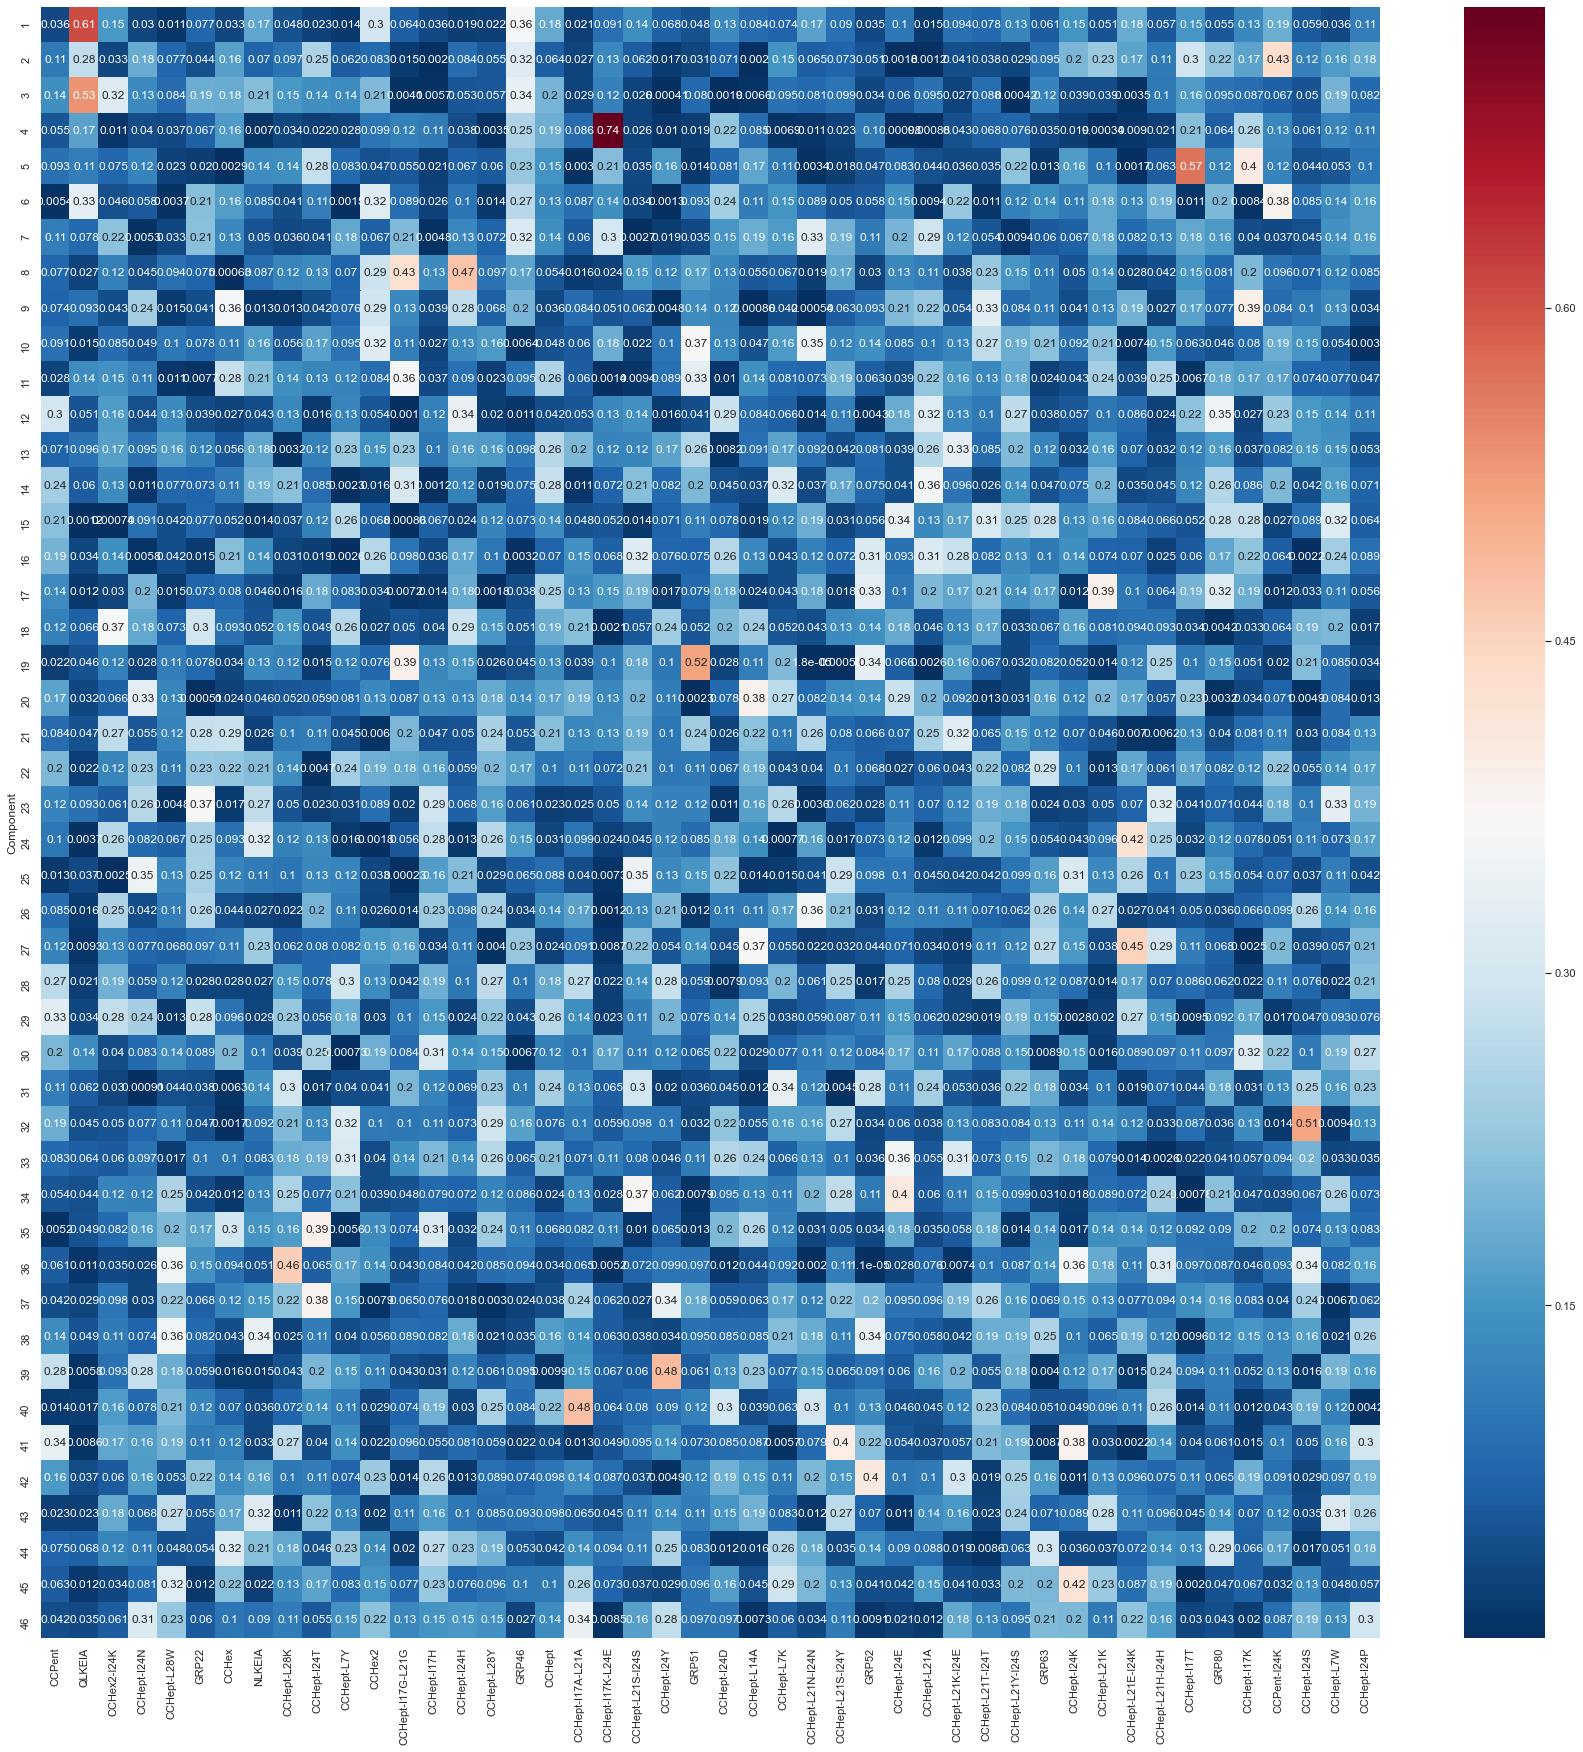

In [27]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

Relative contribution to the different components of each barrel

In [28]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [29]:
relative_pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.006488  0.162094     0.027957     0.005676     0.002058   
2          0.019173  0.073726     0.006010     0.034444     0.014733   
3          0.026068  0.141645     0.057991     0.024869     0.016044   
4          0.009945  0.044927     0.001996     0.007460     0.006983   
5          0.017018  0.029862     0.013605     0.022868     0.004490   
6          0.000979  0.087943     0.008309     0.010925     0.000704   
7          0.020599  0.020800     0.039568     0.000997     0.006267   
8          0.014053  0.007085     0.021045     0.008416     0.017957   
9          0.013561  0.024764     0.007756     0.045205     0.002939   
10         0.016634  0.004009     0.015463     0.009208     0.019360   
11         0.005056  0.036438     0.026610     0.021324     0.002178   
12         0.054733  0.013698     0.028997     0.008210     0.025501   
13         0.012900  0.025611     0.030003     0.017929     0.030833   
14         0.044036  0.016074     0.024188     0.002096     0.014790   
15         0.038952  0.000330     0.000135     0.017120     0.008026   
16         0.035217  0.009009     0.025170     0.001089     0.008013   
17         0.024949  0.003247     0.005441     0.037208     0.002880   
18         0.021418  0.017663     0.066609     0.033220     0.014032   
19         0.004013  0.012296     0.021182     0.005325     0.021665   
20         0.031083  0.008574     0.012020     0.062261     0.023957   
21         0.015334  0.012491     0.049928     0.010319     0.023487   
22         0.036958  0.005721     0.022467     0.043465     0.020659   
23         0.022247  0.024747     0.011016     0.049372     0.000915   
24         0.018699  0.000989     0.047936     0.015388     0.012738   
25         0.002306  0.009750     0.000446     0.065779     0.024726   
26         0.015558  0.004124     0.046017     0.007879     0.021748   
27         0.022275  0.002478     0.023342     0.014512     0.012945   
28         0.049051  0.005703     0.034775     0.011086     0.022614   
29         0.059566  0.009167     0.050462     0.045381     0.002431   
30         0.036322  0.035959     0.007188     0.015654     0.026084   
31         0.020826  0.016555     0.005391     0.000171     0.008374   
32         0.033776  0.011888     0.009097     0.014390     0.020313   
33         0.015192  0.016893     0.010837     0.018289     0.003303   
34         0.009782  0.011776     0.022126     0.022044     0.048388   
35         0.000957  0.012931     0.014826     0.030306     0.038879   
36         0.011131  0.002982     0.006437     0.004886     0.068511   
37         0.007592  0.007729     0.017773     0.005704     0.042942   
38         0.024695  0.013121     0.019339     0.013843     0.068564   
39         0.051236  0.001542     0.016829     0.052857     0.035341   
40         0.002630  0.004641     0.028789     0.014711     0.039406   
41         0.061303  0.002282     0.031559     0.030646     0.036776   
42         0.028728  0.009948     0.010912     0.030151     0.010152   
43         0.004159  0.006068     0.032608     0.012857     0.052496   
44         0.013600  0.018213     0.022486     0.020603     0.009158   
45         0.011536  0.003323     0.006232     0.015144     0.061876   
46         0.007664  0.009186     0.011128     0.058716     0.043762   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1          0.014445  0.006180  0.032204     0.009007     0.004281  ...   
2          0.008222  0.030848  0.012930     0.018113     0.047069  ...   
3          0.034941  0.034349  0.038622     0.028923     0.026656  ...   
4          0.012571  0.030207  0.001291     0.006413     0.004171  ...   
5          0.003752  0.000537  0.025389     0.025856     0.052012  ...   
6          0.039580  0.030394  0.01567

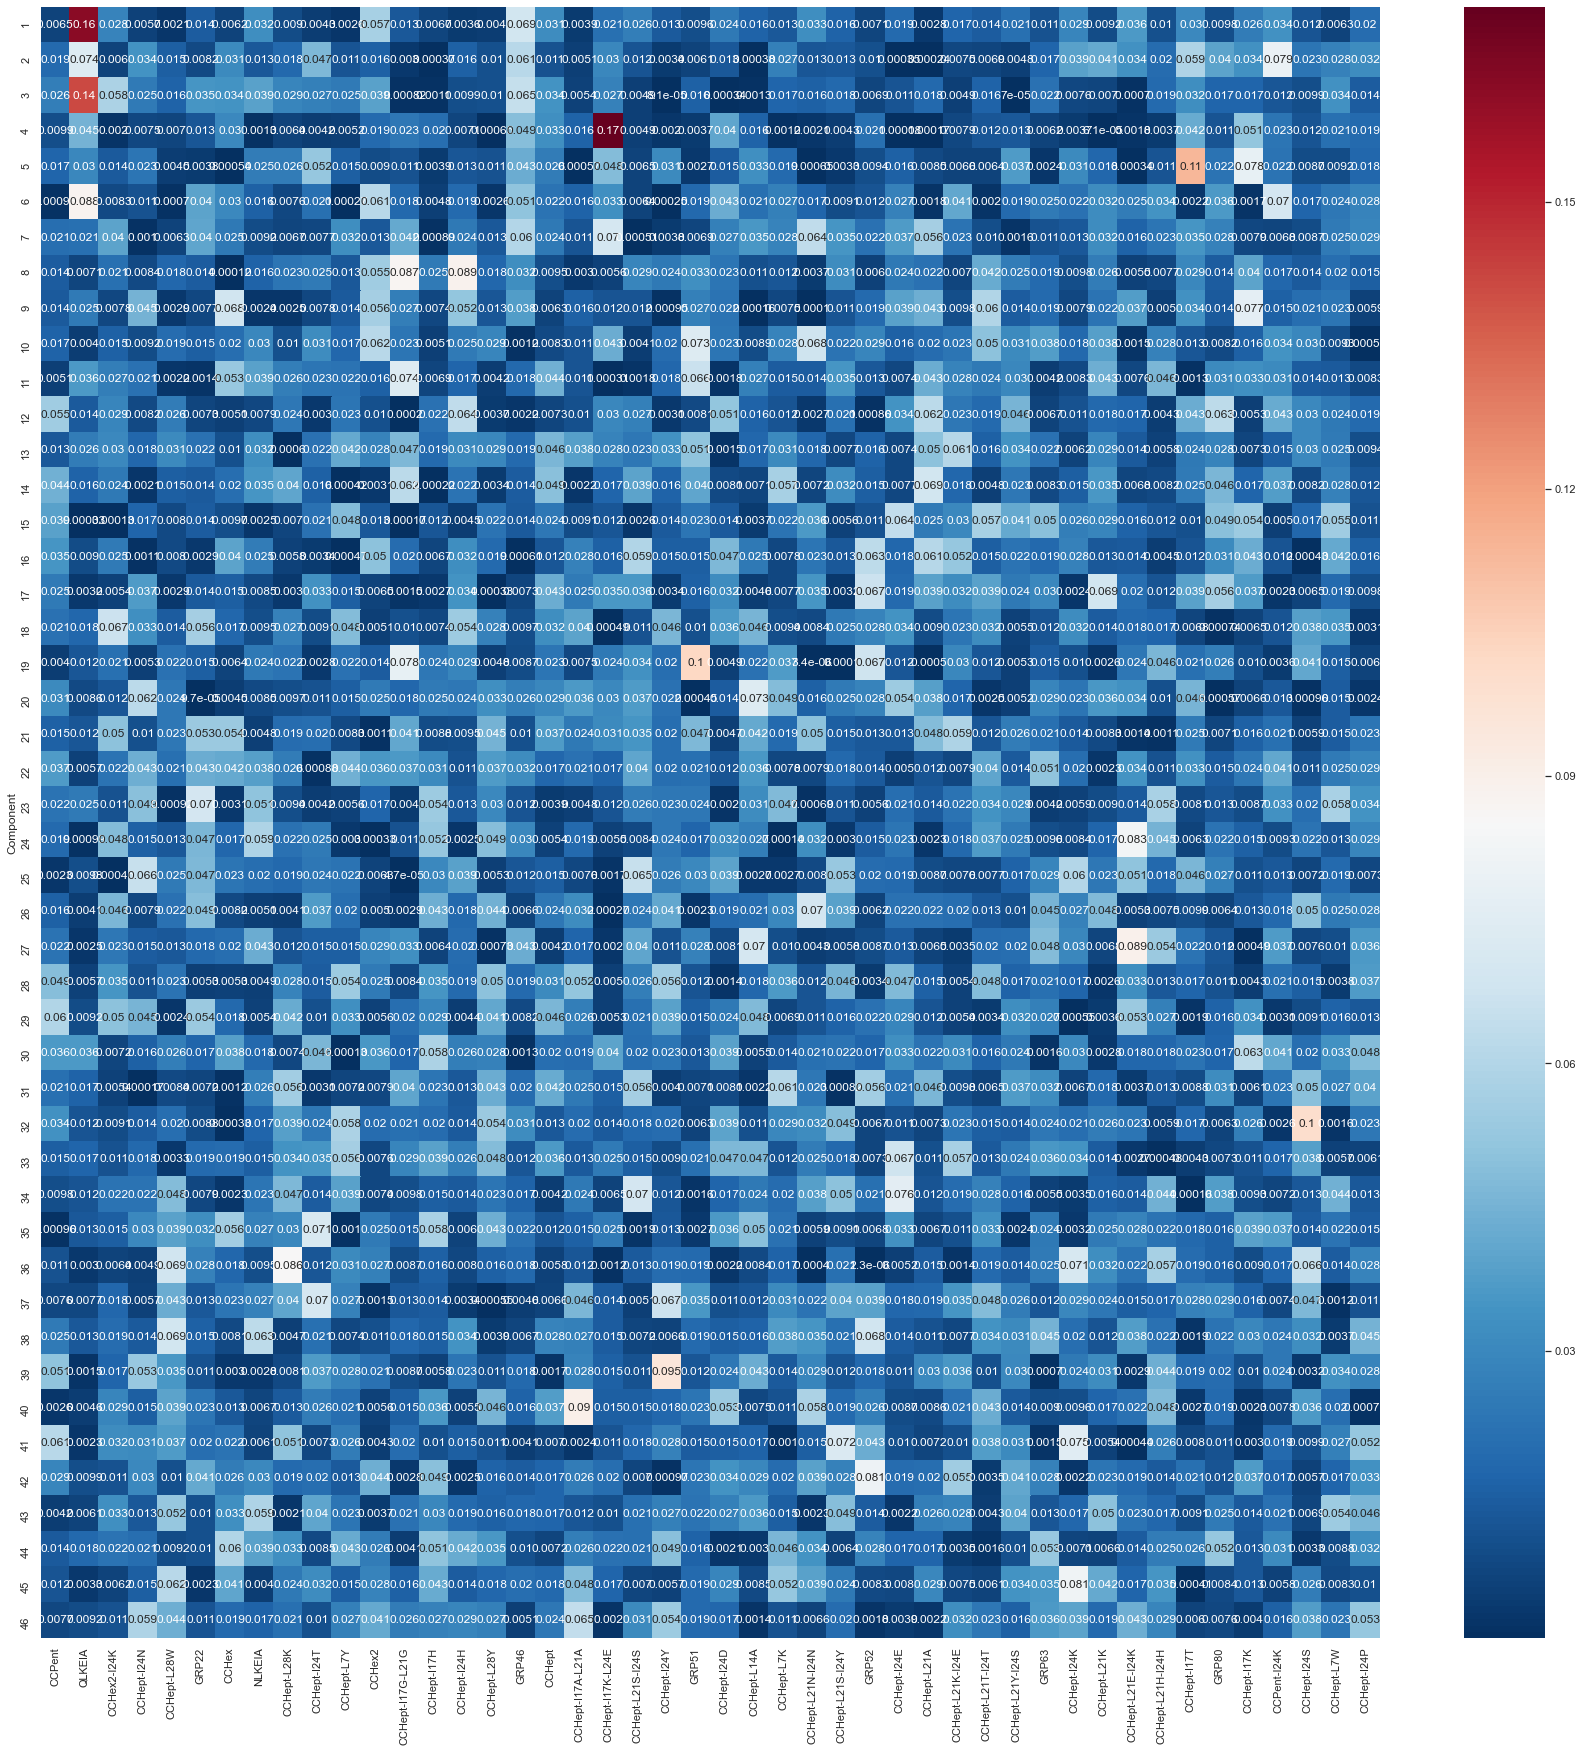

In [30]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [31]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

Scatter plots of data transformed to PCA dimensions

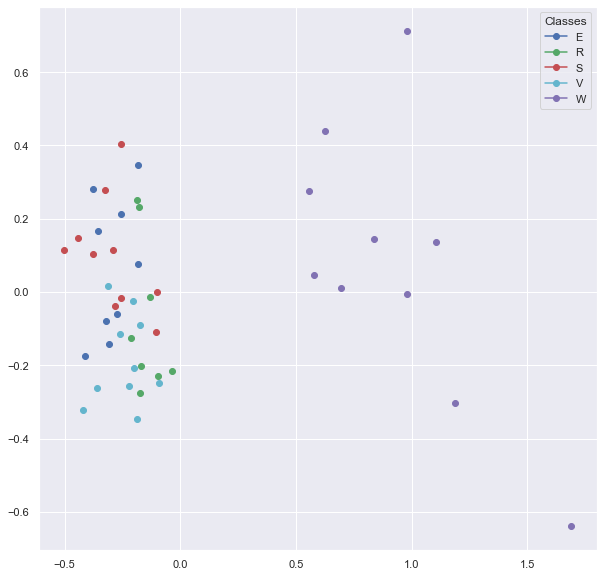

In [32]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

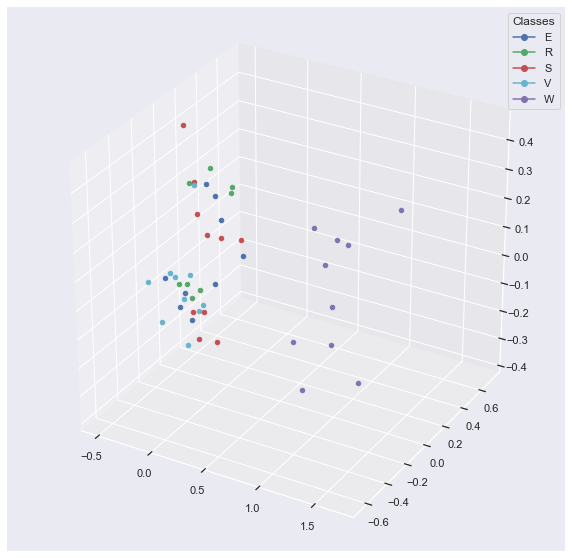

In [33]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

95% of the data is explained by ~25 features => won't perform any PCA.

In [34]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [35]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.31622776601683794}
Best score: 0.5285714285714285






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.31622776601683794}
Best score: 0.5285714285714285
All parameter combinations tested:
1 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 316.22776601683796} 0.414
2 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.01} 0.521
3 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 32768.0}
Best score: 0.5285714285714285
Range tested: [3.12500000e-02 4.41941738e-02 6.25000000e-02 8.83883476e-02
 1.25000000e-01 1.76776695e-01 2.50000000e-01 3.53553391e-01
 5.00000000e-01 7.07106781e-01 1.00000000e+00 1.41421356e+00
 2.00000000e+00 2.82842712e+00 4.00000000e+00 5.65685425e+00
 8.00000000e+00 1.13137085e+01 1.60000000e+01 2.26274170e+01
 3.20000000e+01 4.52548340e+01 6.40000000e+01 9.05096680e+01
 1.28000000e+02 1.81019336e+02 2.56000000e+02 3.62038672e+02
 5.12000000e+02 7.24077344e+02 1.02400000e+03 1.44815469e+03
 2.04800000e+03 2.89630938e+03 4.09600000e+03 5.79261875e+03
 8.19200000e+03 1.15852375e+04 1.63840000e+04 2.31704750e+04
 3.27680000e+04]
Value selected: 32768.0






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 32768.0}
Best score: 0.5285714285714285
All parameter combinations tested:
1 {'LinearSVC__C': 45.254833995939045} 0.525
2 {'LinearSVC__C': 0.3535533

In [36]:
score_df

Algorithm Resampling_method  \
0    LogisticRegression      no_balancing   
1  KNeighborsClassifier      no_balancing   
2            GaussianNB      no_balancing   
3             LinearSVC      no_balancing   
4                   SVC      no_balancing   

                                         Best_params  Best_accuracy_score  \
0  {'LogisticRegression__solver': 'liblinear', 'L...             0.528571   
1  {'KNeighborsClassifier__weights': 'distance', ...             0.521429   
2                                                 {}             0.475000   
3                          {'LinearSVC__C': 32768.0}             0.528571   
4  {'SVC__gamma': 0.04419417382415922, 'SVC__C': ...             0.575000   

   Mean_accuracy_score  Std_dev_accuracy_score  
0             0.432519                0.120356  
1             0.394196                0.118688  
2             0.475000                0.171874  
3             0.519000                0.064974  
4             0.319714                0.074437

So, from this spot check, a **support vector classifier with radial basis function kernel** does a good job.

So, run hyperparameter optimisation for SVC.

In [37]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.005524271728019903, 'SVC__C': 724.0773439350247}
Best score: 0.6607142857142858


In [40]:
grid_tuned_params = {'C': np.linspace(1, 1000, 1000),
                     'gamma': np.linspace(0.0001, 0.01, 100)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 9.0, 'SVC__gamma': 0.0045000000000000005}
Best score: 0.5499999999999999


### So, optimal hyperparameter combination:
- C = 9
- gamma = 0.0045

Model cross-validation score: [0.375      0.625      0.5        0.57142857 0.57142857]
accuracy_score: 0.4444444444444444
recall_score: 0.5
precision_score: 0.36666666666666664
f1_score: 0.4
cohen_kappa_score: 0.3181818181818181
None


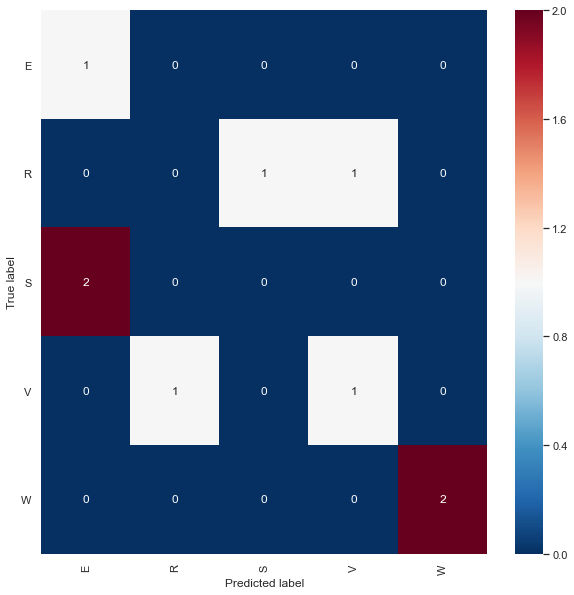

true


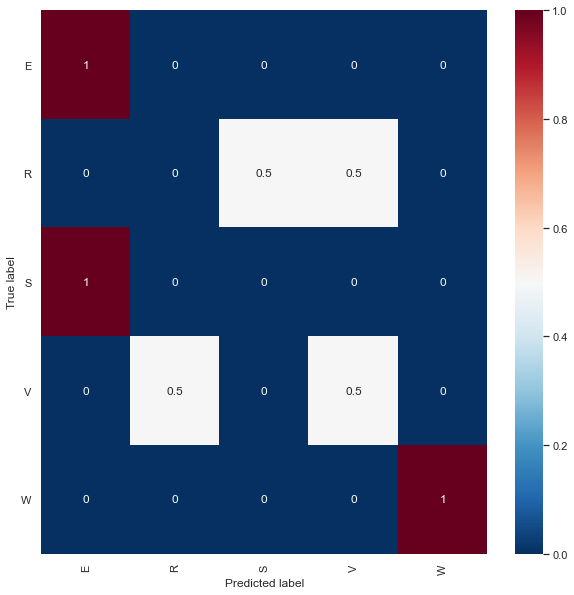

pred


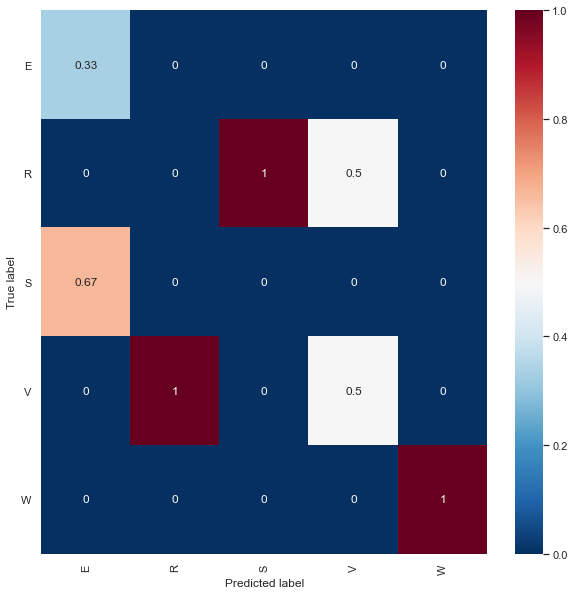

In [41]:
final_params = {'C': 9,
                'gamma': 0.0045}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

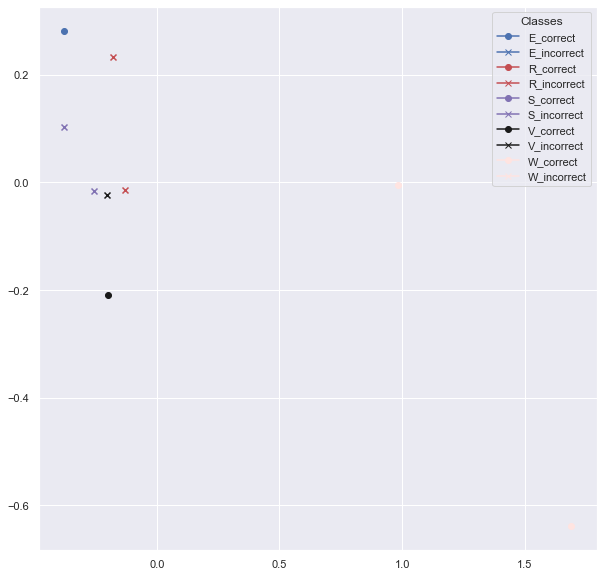

In [44]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['E_correct', 'E_incorrect', 'R_correct', 'R_incorrect', 'S_correct', 'S_incorrect', 'V_correct',
                'V_incorrect', 'W_correct', 'W_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

- Standard array

In [45]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

First split the data into a training and test set

In [46]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/AAs/'
                'Same_plate_AAs/Standard_array_ML_results/', fluor_data=s_aa_fluor_data
)

In [47]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

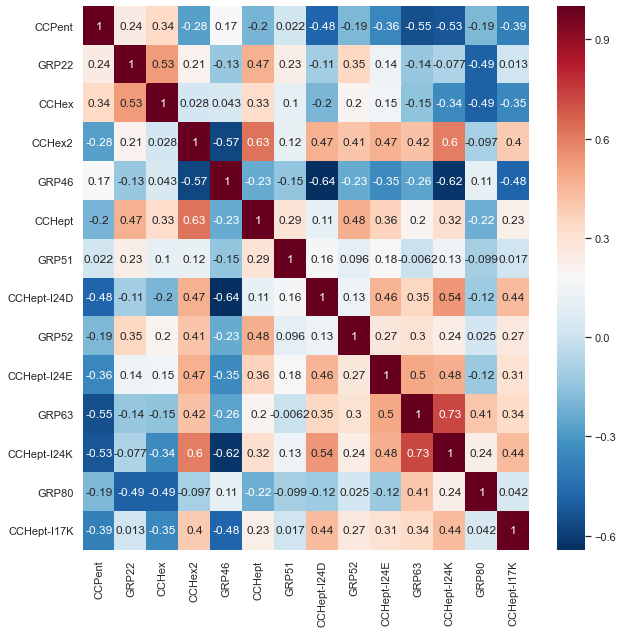

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept  \
CCPent       1.000000  0.245000  0.343469 -0.277143  0.174592 -0.202857   
GRP22        0.245000  1.000000  0.529286  0.212245 -0.133163  0.473673   
CCHex        0.343469  0.529286  1.000000  0.028061  0.043163  0.328061   
CCHex2      -0.277143  0.212245  0.028061  1.000000 -0.567653  0.625204   
GRP46        0.174592 -0.133163  0.043163 -0.567653  1.000000 -0.234796   
CCHept      -0.202857  0.473673  0.328061  0.625204 -0.234796  1.000000   
GRP51        0.021837  0.230408  0.102449  0.120204 -0.148673  0.289694   
CCHept-I24D -0.477551 -0.107041 -0.197143  0.471327 -0.643163  0.111735   
GRP52       -0.193163  0.345714  0.201531  0.413878 -0.232755  0.479898   
CCHept-I24E -0.355306  0.139490  0.147245  0.472857 -0.347245  0.364592   
GRP63       -0.546327 -0.136531 -0.151633  0.416531 -0.258980  0.202143   
CCHept-I24K -0.526939 -0.077143 -0.342143  0.598469 -0.622041  0.317143   
GRP80       -0.190510 -0.492551 -0.489694 -0.096531  0.106429 -0.224286   
CCHept-I17K -0.385918  0.012857 -0.353061  0.395204 -0.480102  0.228571   

                GRP51  CCHept-I24D     GRP52  CCHept-I24E     GRP63  \
CCPent       0.021837    -0.477551 -0.193163    -0.355306 -0.546327   
GRP22        0.230408    -0.107041  0.345714     0.139490 -0.136531   
CCHex        0.102449    -0.197143  0.201531     0.147245 -0.151633   
CCHex2       0.120204     0.471327  0.413878     0.472857  0.416531   
GRP46       -0.148673    -0.643163 -0.232755    -0.347245 -0.258980   
CCHept       0.289694     0.111735  0.479898     0.364592  0.202143   
GRP51        1.000000     0.164184  0.095510     0.180816 -0.006224   
CCHept-I24D  0.164184     1.000000  0.132959     0.459796  0.354898   
GRP52        0.095510     0.132959  1.000000     0.273571  0.300000   
CCHept-I24E  0.180816     0.459796  0.273571     1.000000  0.495510   
GRP63       -0.006224     0.354898  0.300000     0.495510  1.000000   
CCHept-I24K  0.130408     0.540306  0.241735     0.479184  0.729898   
GRP80       -0.099490    -0.118776  0.025000    -0.123980  0.406939   
CCHept-I17K  0.017041     0.439490  0.266939     0.305408  0.336327   

             CCHept-I24K     GRP80  CCHept-I17K  
CCPent         -0.526939 -0.190510    -0.385918  
GRP22          -0.077143 -0.492551     0.012857  
CCHex          -0.342143 -0.489694    -0.353061  
CCHex2          0.598469 -0.096531     0.395204  
GRP46          -0.622041  0.106429    -0.480102  
CCHept          0.317143 -0.224286     0.228571  
GRP51           0.130408 -0.099490     0.017041  
CCHept-I24D     0.540306 -0.118776     0.439490  
GRP52           0.241735  0.025000     0.266939  
CCHept-I24E     0.479184 -0.123980     0.305408  
GRP63           0.729898  0.406939     0.336327  
CCHept-I24K     1.000000  0.235918     0.439592  
GRP80           0.235918  1.000000     0.041633  
CCHept-I17K     0.439592  0.041633     1.000000

In [48]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

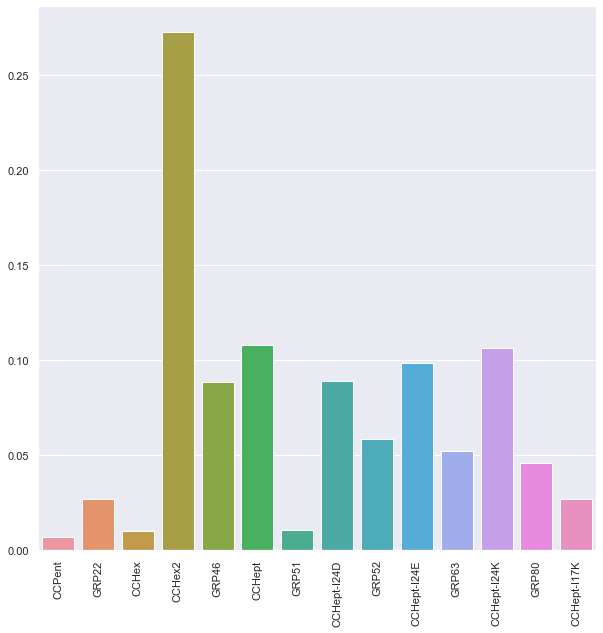

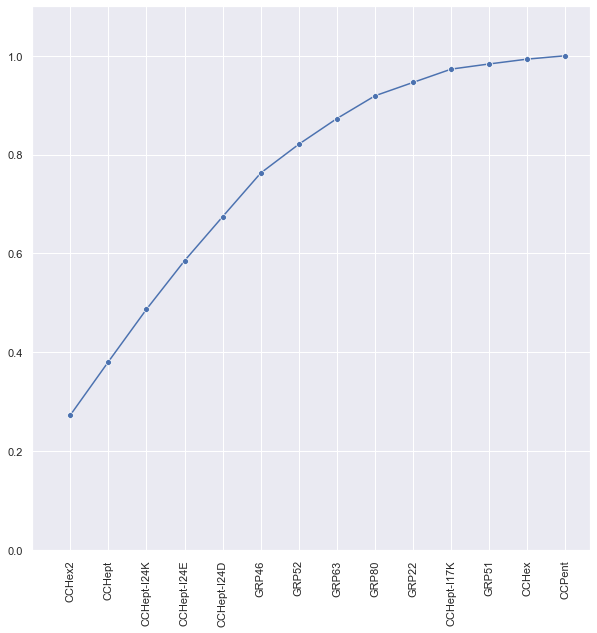

Feature     Score
0        CCHex2  0.272760
1        CCHept  0.108053
2   CCHept-I24K  0.106138
3   CCHept-I24E  0.098303
4   CCHept-I24D  0.089120
5         GRP46  0.088298
6         GRP52  0.058248
7         GRP63  0.051990
8         GRP80  0.046052
9         GRP22  0.027060
10  CCHept-I17K  0.026913
11        GRP51  0.010476
12        CCHex  0.009773
13       CCPent  0.006816

In [49]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

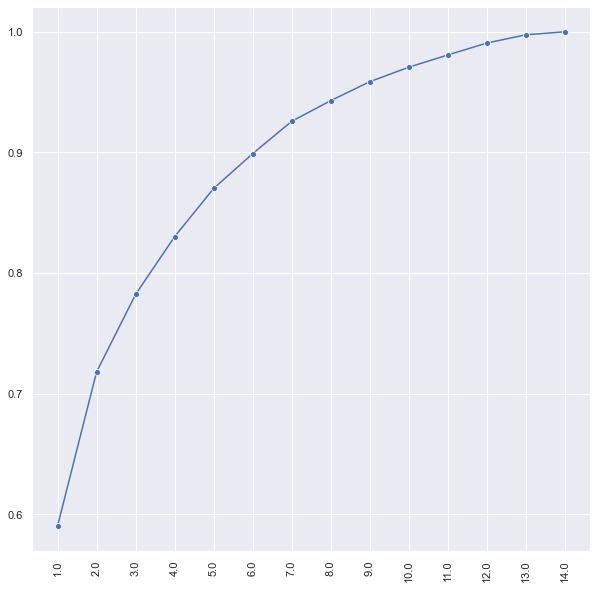

In [50]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [51]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [52]:
pca_components

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept  \
Component                                                               
1          0.068090 -0.096743 -0.009314 -0.491704  0.660578 -0.278806   
2         -0.180132 -0.351248 -0.460908 -0.213547 -0.026803 -0.333400   
3         -0.164747 -0.112615 -0.061468  0.557426  0.553189  0.281178   
4          0.035947 -0.105549  0.017580 -0.089945 -0.354415 -0.012373   
5          0.069219  0.286114 -0.071473 -0.222152 -0.095694  0.346777   
6         -0.289069  0.068103 -0.044535 -0.353510  0.185919  0.345747   
7         -0.243569  0.142101  0.477735 -0.341618 -0.104260  0.021642   
8         -0.536818  0.020649 -0.350915 -0.095767 -0.061218  0.336050   
9          0.386026  0.308494 -0.328394  0.034245  0.042483 -0.167070   
10        -0.295748  0.418271 -0.270963  0.000247 -0.029982 -0.384300   
11         0.143636  0.554561 -0.205974 -0.024851  0.096517  0.168763   
12        -0.210183 -0.218911 -0.166623  0.097001 -0.196889 -0.044341   
13        -0.418037  0.323748  0.180586  0.287063  0.004713 -0.391885   
14        -0.150283  0.077028  0.375316  0.003550  0.148805 -0.138146   

              GRP51  CCHept-I24D     GRP52  CCHept-I24E     GRP63  \
Component                                                           
1         -0.073652    -0.237380 -0.070313    -0.143524 -0.106787   
2         -0.084155     0.223252 -0.066112    -0.024664  0.183827   
3         -0.121780    -0.172118  0.234290     0.076372  0.220179   
4          0.099428    -0.180905  0.065071    -0.175450  0.109497   
5          0.139811    -0.459992  0.189952    -0.330289 -0.163558   
6          0.655518     0.136594 -0.055215     0.337660  0.163715   
7         -0.476530    -0.143444  0.087119     0.310621  0.439500   
8         -0.367263    -0.097214 -0.231045    -0.313167 -0.088764   
9         -0.027011    -0.447292 -0.244427     0.211879  0.258977   
10         0.025783     0.026688  0.680127     0.106328 -0.113928   
11        -0.255646     0.427378 -0.283054     0.188171 -0.131078   
12        -0.003020    -0.415342 -0.183032     0.605181 -0.370317   
13         0.287377    -0.123282 -0.431464    -0.256053  0.219427   
14        -0.047118     0.006232 -0.096745     0.033150 -0.597687   

           CCHept-I24K     GRP80  CCHept-I17K  
Component                                      
1            -0.266564  0.022992    -0.244426  
2             0.179628  0.384124     0.445816  
3             0.073810  0.318573    -0.001142  
4             0.140523  0.592392    -0.626986  
5            -0.135294  0.262503     0.489082  
6             0.182357 -0.015069    -0.070943  
7             0.009581  0.072390     0.118261  
8             0.169341 -0.287340    -0.217952  
9             0.470301 -0.151950    -0.017455  
10            0.005981 -0.091091    -0.137870  
11           -0.216361  0.394141    -0.090094  
12           -0.335205  0.090630    -0.004769  
13           -0.203584  0.086234     0.072668  
14            0.607715  0.200452     0.099671

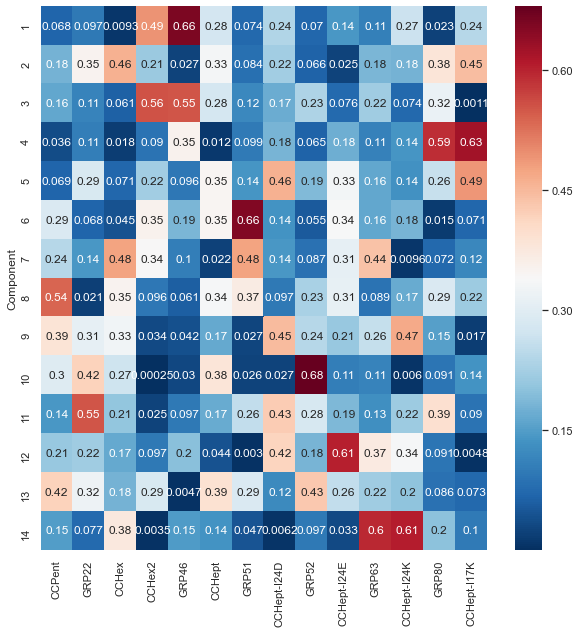

In [53]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [54]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [55]:
relative_pca_components

CCPent     GRP22     CCHex    CCHex2     GRP46    CCHept  \
Component                                                               
1          0.021335  0.031368  0.003082  0.174820  0.257891  0.085774   
2          0.056441  0.113889  0.152528  0.075925  0.010464  0.102569   
3          0.051621  0.036514  0.020342  0.198187  0.215966  0.086503   
4          0.011263  0.034223  0.005818  0.031979  0.138364  0.003807   
5          0.021688  0.092770  0.023652  0.078984  0.037359  0.106685   
6          0.090574  0.022082  0.014738  0.125687  0.072583  0.106368   
7          0.076318  0.046075  0.158097  0.121459  0.040703  0.006658   
8          0.168202  0.006695  0.116128  0.034049  0.023900  0.103385   
9          0.120954  0.100026  0.108676  0.012175  0.016585  0.051399   
10         0.092667  0.135620  0.089670  0.000088  0.011705  0.118229   
11         0.045006  0.179811  0.068163  0.008835  0.037680  0.051920   
12         0.065857  0.070980  0.055141  0.034488  0.076866  0.013641   
13         0.130984  0.104972  0.059761  0.102062  0.001840  0.120562   
14         0.047088  0.024975  0.124204  0.001262  0.058094  0.042500   

              GRP51  CCHept-I24D     GRP52  CCHept-I24E     GRP63  \
Component                                                           
1          0.027646     0.076646  0.024096     0.046112  0.033716   
2          0.031589     0.072084  0.022657     0.007924  0.058040   
3          0.045712     0.055574  0.080292     0.024537  0.069518   
4          0.037322     0.058411  0.022300     0.056369  0.034572   
5          0.052480     0.148523  0.065097     0.106117  0.051640   
6          0.246057     0.044104  0.018922     0.108485  0.051690   
7          0.178871     0.046315  0.029856     0.099798  0.138764   
8          0.137857     0.031389  0.079180     0.100616  0.028026   
9          0.010139     0.144422  0.083766     0.068073  0.081768   
10         0.009678     0.008617  0.233083     0.034161  0.035971   
11         0.095960     0.137992  0.097004     0.060456  0.041385   
12         0.001134     0.134106  0.062726     0.194435  0.116921   
13         0.107871     0.039806  0.147865     0.082266  0.069280   
14         0.017686     0.002012  0.033155     0.010651  0.188709   

           CCHept-I24K     GRP80  CCHept-I17K  
Component                                      
1             0.088966  0.007742     0.092686  
2             0.059951  0.129340     0.169053  
3             0.024634  0.107268     0.000433  
4             0.046900  0.199467     0.237753  
5             0.045154  0.088388     0.185459  
6             0.060862  0.005074     0.026901  
7             0.003198  0.024375     0.044844  
8             0.056518  0.096751     0.082647  
9             0.156963  0.051164     0.006619  
10            0.001996  0.030672     0.052280  
11            0.072211  0.132713     0.034164  
12            0.111875  0.030516     0.001809  
13            0.067946  0.029036     0.027556  
14            0.202825  0.067495     0.037795

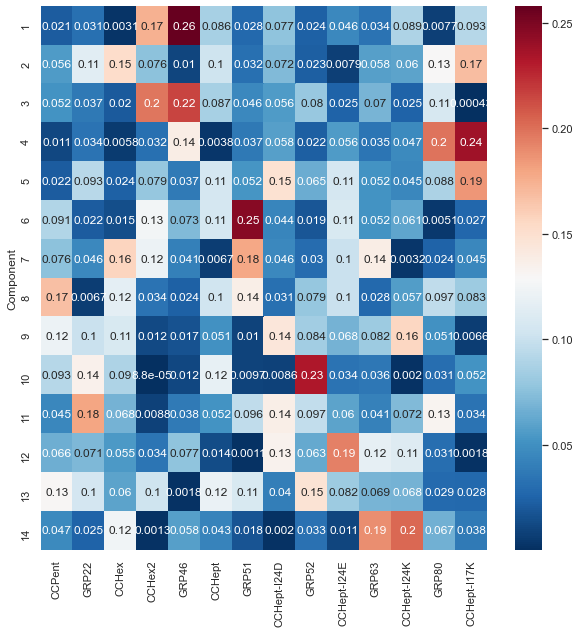

In [56]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

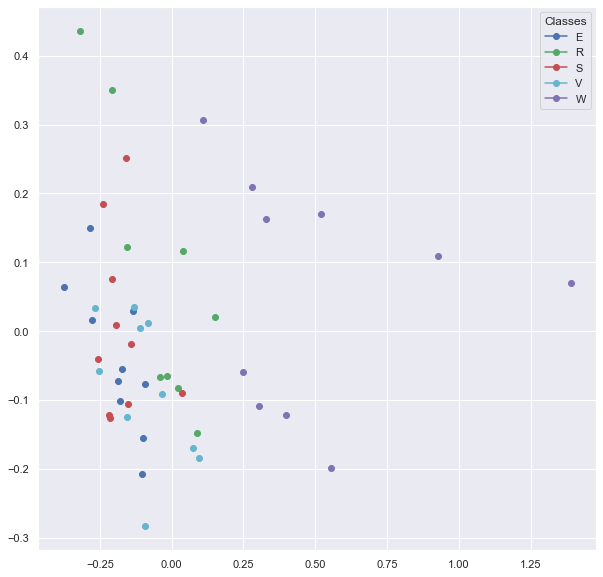

In [57]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

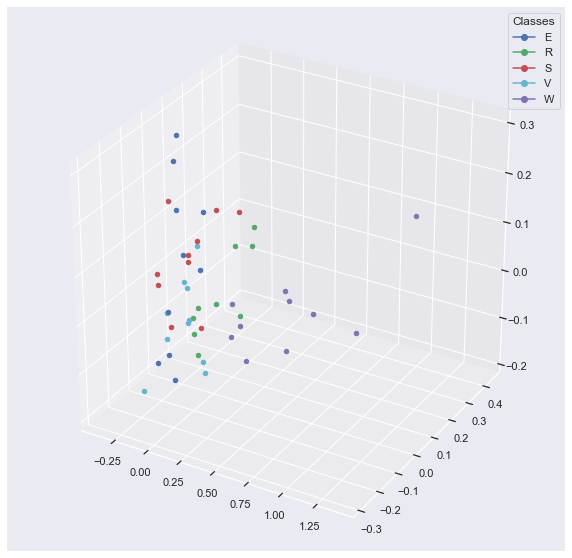

In [58]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

For comparison with the large array, will retain all 14 features (without performing PCA, to enable fair comparison with the larger array)

In [59]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [60]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3162.2776601683795}
Best score: 0.5






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3162.2776601683795}
Best score: 0.5
All parameter combinations tested:
1 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.03162277660168379} 0.475
2 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 3162.2776601683795} 0.425
3 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 16.0}
Best score: 0.45






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 16.0}
Best score: 0.45
All parameter combinations tested:
1 {'LinearSVC__C': 1.4142135623730951} 0.375
2 {'LinearSVC__C': 0.1767766952966369} 0.35
3 {'LinearSVC__C': 0.25} 0.375
4 {'LinearSVC__C': 11.313708498984761} 0.425
5 {'LinearSVC__C': 0.7071067811865476} 0.375
6 {'LinearSVC__C': 0.0625} 0.325
7 {'LinearSVC__C': 45.254833995939045} 0.375
8 {'LinearSVC__C': 0.04419417382415922} 0.325
9 {'LinearSVC__C': 2.8284271247461903} 0.375
10 {'LinearSVC__C': 0.08838834764831845} 0.325
11 {'LinearSVC__C': 181.01933598375618} 0.375
12 {'LinearSVC__C': 2.0} 0.375
13 {'LinearSVC__C': 11585.237502960395} 0.35
14 {'LinearSVC__C': 0.125} 0.325
15 {'LinearSVC__C': 32.0} 0.35
16 {'LinearSVC__C': 1024.0} 0.35
17 {'LinearSVC__C': 16.0} 0.45
18 {'LinearSVC__C': 90.50966799187809} 0.375
19 {'LinearSVC__C': 362.03867196751236} 0.375
20 {'

In [61]:
score_df

Algorithm Resampling_method  \
0    LogisticRegression      no_balancing   
1  KNeighborsClassifier      no_balancing   
2            GaussianNB      no_balancing   
3             LinearSVC      no_balancing   
4                   SVC      no_balancing   

                                         Best_params  Best_accuracy_score  \
0  {'LogisticRegression__solver': 'saga', 'Logist...                0.500   
1  {'KNeighborsClassifier__weights': 'distance', ...                0.525   
2                                                 {}                0.450   
3                             {'LinearSVC__C': 16.0}                0.450   
4  {'SVC__gamma': 0.00048828125, 'SVC__C': 5792.6...                0.475   

   Mean_accuracy_score  Std_dev_accuracy_score  
0             0.463333                0.116243  
1             0.435000                0.108142  
2             0.450000                0.169558  
3             0.366000                0.123592  
4             0.279000                0.083735

For best comparison with large array, will pick SVC. The above spot check confirms that it does a reasonable job (and isn't hugely worse than the other algorithms tested).

So, run hyperparameter optimisation for SVC.

In [62]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 8.631674575031098e-05, 'SVC__C': 23170.47500592079}
Best score: 0.5


In [63]:
grid_tuned_params = {'C': np.linspace(200, 40000, 200),
                     'gamma': np.linspace(0.000005, 0.0005, 100)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 600.0, 'SVC__gamma': 0.000365}
Best score: 0.5


### So, optimal hyperparameter combination:
- C = 600
- gamma = 0.000365

Model cross-validation score: [0.5   0.25  0.75  0.25  0.625]
accuracy_score: 0.3333333333333333
recall_score: 0.3
precision_score: 0.24
f1_score: 0.2571428571428572
cohen_kappa_score: 0.1562500000000001
None


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


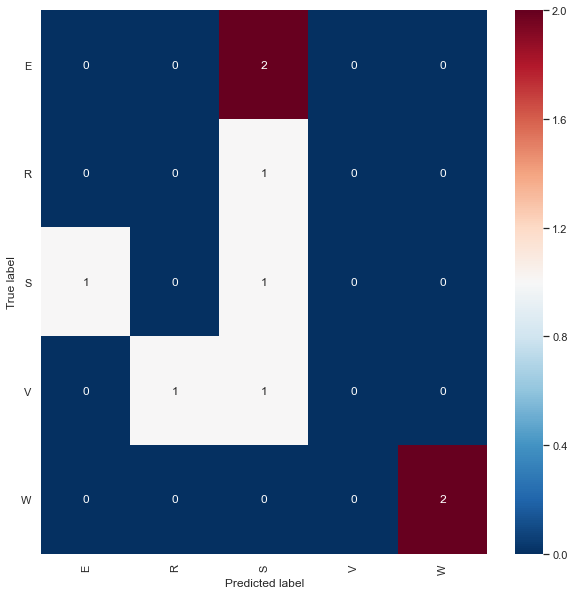

true


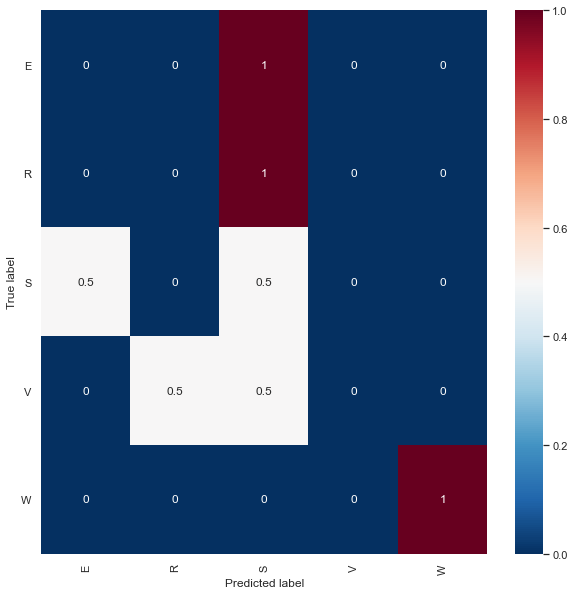

pred


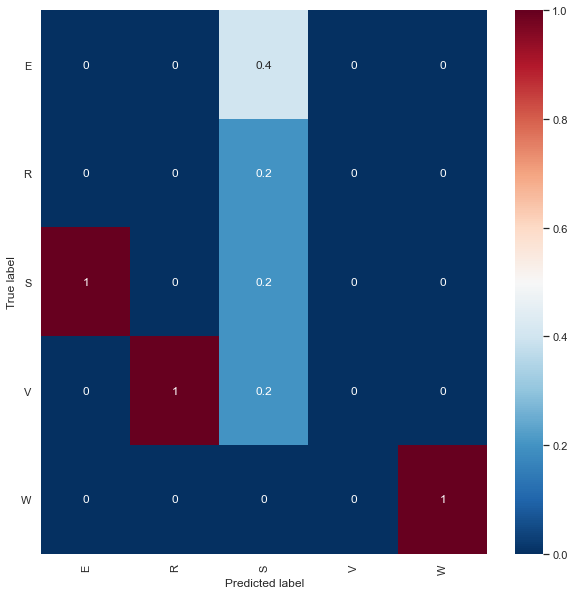

In [64]:
final_params = {'C': 600,
                'gamma': 0.000365}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

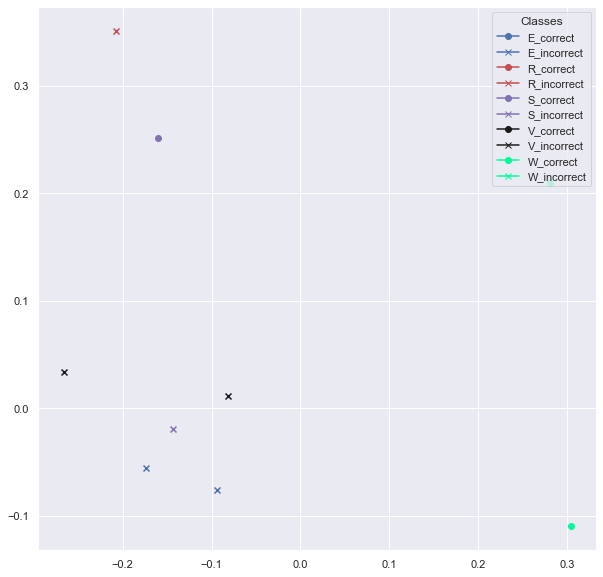

In [67]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['E_correct', 'E_incorrect', 'R_correct', 'R_incorrect', 'S_correct', 'S_incorrect', 'V_correct',
                'V_incorrect', 'W_correct', 'W_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

The performance of the models trained on the two arrays is very similar - the model trained on the larger array performs slightly better, but because of the small size of the test dataset this is within error (would need to bootstrap to test if there is a significant difference in performance).